# LIBRARY AND DATA FETCHER

In [ ]:
# S&P 500 COMPLETE INVESTMENT SYSTEM WITH VAR-ES ENGINE & ML PREDICTIONS
# Fixed version with all advanced features working properly

import numpy as np 
import pandas as pd
import yfinance as yf
from scipy import stats
from scipy.optimize import minimize
from scipy.stats import norm, chi2
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 80)
print("S&P 500 COMPLETE INVESTMENT SYSTEM")
print("WITH VAR-ES RISK ENGINE & ML PREDICTIONS")
print("=" * 80)

# ============================================
# PART 1: COMPREHENSIVE DATA FETCHER
# ============================================

class SP500DataFetcher:
    """Fetch comprehensive S&P 500 data with fundamentals"""

    def __init__(self):
        # Complete list of 468 S&P 500 stocks across all sectors
        self.tickers = [
            # Technology (50 stocks)
            'AAPL', 'MSFT', 'NVDA', 'AVGO', 'ORCL', 'CSCO', 'ADBE', 'CRM', 'AMD', 'INTC', 'IBM',
            'ACN', 'TXN', 'QCOM', 'NOW', 'INTU', 'MU', 'AMAT', 'LRCX', 'ADI',
            'KLAC', 'SNPS', 'CDNS', 'MCHP', 'ON', 'MPWR', 'KEYS', 'FTNT', 'MSI', 'HPQ',
            'HPE', 'GLW', 'ANSS', 'VRSN', 'FFIV', 'JNPR', 'ZBRA', 'TRMB', 'TYL', 'STX',
            'WDC', 'NTAP', 'ENPH', 'TER', 'SWKS', 'TDY', 'PTC', 'FSLR', 'IT', 'GEN',

            # Communication Services (23 stocks)
            'GOOGL', 'GOOG', 'META', 'DIS', 'NFLX', 'VZ', 'CMCSA', 'T', 'TMUS', 'CHTR',
            'EA', 'TTWO', 'WBD', 'FOXA', 'FOX', 'LYV', 'NWSA', 'NWS', 'OMC', 'IPG',
            'MTCH', 'PARA', 'DISH',

            # Healthcare (63 stocks)
            'UNH', 'JNJ', 'LLY', 'PFE', 'ABBV', 'MRK', 'TMO', 'ABT', 'CVS', 'AMGN',
            'DHR', 'BMY', 'GILD', 'MDT', 'VRTX', 'ELV', 'CI', 'REGN', 'SYK', 'ZTS',
            'HUM', 'BSX', 'EW', 'A', 'ISRG', 'HCA', 'MCK', 'IQV', 'CNC', 'DXCM',
            'BDX', 'BIIB', 'MRNA', 'COO', 'MOH', 'RMD', 'COR', 'BAX', 'GEHC', 'ALGN',
            'HOLX', 'STE', 'IDXX', 'ILMN', 'MTD', 'WAT', 'ZBH', 'PKI', 'PODD', 'INCY',
            'TECH', 'BIO', 'VTRS', 'CRL', 'CTLT', 'HSIC', 'XRAY', 'DVA', 'UHS', 'CAH',
            'ABC', 'LH', 'DGX',

            # Financial (61 stocks)
            'BRK-B', 'JPM', 'V', 'MA', 'BAC', 'WFC', 'GS', 'MS', 'BLK', 'SPGI',
            'C', 'SCHW', 'AXP', 'CB', 'PGR', 'MMC', 'AON', 'ICE', 'CME', 'USB',
            'PNC', 'TFC', 'AJG', 'BK', 'AMP', 'AFL', 'ALL', 'MET', 'PRU', 'TRV',
            'BRO', 'MSCI', 'TROW', 'STT', 'COF', 'FITB', 'KEY', 'RF', 'CFG', 'HBAN',
            'CINF', 'NTRS', 'WRB', 'FDS', 'RJF', 'HIG', 'MTB', 'CBOE', 'DFS', 'L',
            'SYF', 'CMA', 'NDAQ', 'BEN', 'RE', 'AIZ', 'GL', 'IVZ', 'ZION', 'MKTX',
            'FNF',

            # Consumer Discretionary (56 stocks)
            'AMZN', 'TSLA', 'HD', 'MCD', 'NKE', 'LOW', 'SBUX', 'TJX', 'BKNG', 'MAR',
            'GM', 'HLT', 'ABNB', 'F', 'TGT', 'ROST', 'AZO', 'ORLY', 'CMG', 'DHI',
            'LEN', 'YUM', 'GRMN', 'EBAY', 'LVS', 'DECK', 'EXPE', 'CCL', 'RCL', 'APTV',
            'ULTA', 'DRI', 'BBY', 'ETSY', 'LKQ', 'BLD', 'PHM', 'POOL', 'TSCO', 'TPR',
            'NVR', 'DPZ', 'BBWI', 'BWA', 'CZR', 'WYNN', 'MGM', 'HAS', 'RL', 'VFC',
            'PVH', 'UAA', 'UA', 'NWL', 'MHK', 'WHR',

            # Consumer Staples (37 stocks)
            'WMT', 'PG', 'COST', 'KO', 'PEP', 'PM', 'MDLZ', 'MO', 'CVS', 'CL',
            'DG', 'KMB', 'MNST', 'KDP', 'GIS', 'ADM', 'SJM', 'HSY', 'CHD', 'K',
            'STZ', 'KHC', 'DLTR', 'MKC', 'TSN', 'BG', 'CPB', 'HRL', 'CAG', 'LW',
            'TAP', 'BF-B', 'EL', 'CLX', 'WBA', 'KR', 'SYY',

            # Energy (24 stocks)
            'XOM', 'CVX', 'COP', 'EOG', 'MPC', 'SLB', 'PXD', 'PSX', 'VLO', 'OXY',
            'HES', 'KMI', 'WMB', 'OKE', 'FANG', 'TRGP', 'DVN', 'BKR', 'HAL', 'CTRA',
            'MRO', 'APA', 'DINO', 'NOV',

            # Industrials (72 stocks)
            'CAT', 'BA', 'HON', 'UPS', 'RTX', 'LMT', 'UNP', 'DE', 'ADP', 'GE',
            'ITW', 'MMM', 'NOC', 'GD', 'CSX', 'NSC', 'FDX', 'EMR', 'ETN', 'PH',
            'CARR', 'PCAR', 'JCI', 'TT', 'CMI', 'OTIS', 'FAST', 'LHX', 'HWM', 'AME',
            'PAYX', 'ODFL', 'ROK', 'DOV', 'VRSK', 'WAB', 'EFX', 'LDOS', 'XYL', 'IR',
            'CTAS', 'VLTO', 'TDG', 'SWK', 'DAL', 'EXPD', 'PKG', 'GWW', 'PNR', 'IEX',
            'JBHT', 'CHRW', 'URI', 'TXT', 'WM', 'ROL', 'MAS', 'PWR', 'J', 'HII',
            'ALLE', 'NDSN', 'GNRC', 'AOS', 'SNA', 'HUBB', 'UAL', 'LUV', 'AAL', 'ALK',
            'PAYC', 'BALL',

            # Materials (26 stocks)
            'LIN', 'SHW', 'APD', 'FCX', 'ECL', 'CTVA', 'NUE', 'DD', 'DOW', 'PPG',
            'NEM', 'VMC', 'MLM', 'ALB', 'STLD', 'CF', 'IP', 'AMCR', 'AVY', 'CE',
            'LYB', 'FMC', 'IFF', 'EMN', 'MOS', 'SEE',

            # Real Estate (31 stocks)
            'PLD', 'AMT', 'CCI', 'EQIX', 'PSA', 'SPG', 'VICI', 'WELL', 'AVB', 'EQR',
            'SBAC', 'WY', 'DLR', 'O', 'CBRE', 'INVH', 'EXR', 'IRM', 'CSGP', 'VTR',
            'ESS', 'MAA', 'ARE', 'KIM', 'DOC', 'UDR', 'CPT', 'HST', 'REG', 'BXP',
            'FRT',

            # Utilities (31 stocks)
            'NEE', 'SO', 'DUK', 'CEG', 'SRE', 'AEP', 'D', 'PCG', 'EXC', 'XEL',
            'ED', 'WEC', 'PEG', 'ES', 'EIX', 'ETR', 'AWK', 'PPL', 'DTE', 'AEE',
            'ATO', 'CNP', 'CMS', 'FE', 'AES', 'LNT', 'EVRG', 'NI', 'PNW', 'NRG',
            'AGL',

            # Market ETFs (10 ETFs)
            'SPY', 'QQQ', 'DIA', 'IWM', 'VTI', 'VOO', 'IVV', 'EFA', 'EEM', 'AGG'
        ]

        # Remove duplicates while preserving order
        seen = set()
        self.tickers = [x for x in self.tickers if not (x in seen or seen.add(x))]

        print(f"Initialized with {len(self.tickers)} unique stocks and ETFs")

        self.prices = None
        self.returns = None
        self.volume = None

    def fetch_data(self, start_date='2019-01-01', end_date=None):
        """Fetch comprehensive market data with robust error handling for 468 stocks"""
        if end_date is None:
            end_date = datetime.now().strftime('%Y-%m-%d')

        print(f"\n📊 Fetching data for {len(self.tickers)} stocks and ETFs...")
        print(f"📅 Period: {start_date} to {end_date}")
        print("⏳ This will take several minutes due to the large number of stocks...")

        all_data = {}
        failed = []

        # Remove duplicates and problematic tickers
        clean_tickers = list(set(self.tickers))

        # For special tickers with dashes (like BRK-B), handle separately
        special_tickers = [t for t in clean_tickers if '-' in t]
        regular_tickers = [t for t in clean_tickers if '-' not in t]

        # First, try to download special tickers individually
        print(f"\n📥 Downloading special tickers: {special_tickers}")
        for ticker in special_tickers:
            try:
                ticker_clean = ticker.replace('-', '.')  # Yahoo Finance uses dots
                data = yf.download(ticker_clean, start=start_date, end=end_date,
                                 progress=False, auto_adjust=True, threads=False)

                if not data.empty and 'Close' in data.columns and not data['Close'].isna().all():
                    all_data[ticker] = {
                        'Close': data['Close'],
                        'Volume': data['Volume'] if 'Volume' in data.columns else pd.Series(),
                        'High': data['High'] if 'High' in data.columns else pd.Series(),
                        'Low': data['Low'] if 'Low' in data.columns else pd.Series()
                    }
                    print(f"  ✓ {ticker}")
                else:
                    failed.append(ticker)
            except:
                failed.append(ticker)

        # Download regular tickers in optimized batches
        batch_size = 20  # Larger batches for efficiency
        successful_count = len(all_data)

        print(f"\n📥 Downloading {len(regular_tickers)} regular tickers in batches of {batch_size}...")

        for i in range(0, len(regular_tickers), batch_size):
            batch = regular_tickers[i:i+batch_size]
            batch_num = i//batch_size + 1
            total_batches = (len(regular_tickers)-1)//batch_size + 1

            print(f"\n  Batch {batch_num}/{total_batches} ({len(batch)} tickers):", end=" ")

            # Try batch download first (faster)
            try:
                batch_str = ' '.join(batch)
                data = yf.download(batch_str, start=start_date, end=end_date,
                                 progress=False, group_by='ticker', auto_adjust=True,
                                 threads=True)

                if not data.empty:
                    # Process multi-ticker download
                    if len(batch) > 1:
                        for ticker in batch:
                            try:
                                if hasattr(data.columns, 'levels') and ticker in data.columns.levels[0]:
                                    ticker_data = data[ticker]
                                    if not ticker_data['Close'].isna().all():
                                        all_data[ticker] = {
                                            'Close': ticker_data['Close'],
                                            'Volume': ticker_data['Volume'] if 'Volume' in ticker_data else pd.Series(),
                                            'High': ticker_data['High'] if 'High' in ticker_data else pd.Series(),
                                            'Low': ticker_data['Low'] if 'Low' in ticker_data else pd.Series()
                                        }
                                        successful_count += 1
                                        print("✓", end="")
                                    else:
                                        failed.append(ticker)
                                        print("✗", end="")
                                else:
                                    failed.append(ticker)
                                    print("○", end="")
                            except:
                                failed.append(ticker)
                                print("✗", end="")
                    else:
                        # Single ticker in batch
                        ticker = batch[0]
                        if not data['Close'].isna().all():
                            all_data[ticker] = {
                                'Close': data['Close'],
                                'Volume': data['Volume'] if 'Volume' in data.columns else pd.Series(),
                                'High': data['High'] if 'High' in data.columns else pd.Series(),
                                'Low': data['Low'] if 'Low' in data.columns else pd.Series()
                            }
                            successful_count += 1
                            print("✓", end="")
                        else:
                            failed.append(ticker)
                            print("✗", end="")
                else:
                    # Batch failed, try individually
                    print("\n    Batch failed, trying individually: ", end="")
                    for ticker in batch:
                        try:
                            data = yf.download(ticker, start=start_date, end=end_date,
                                             progress=False, auto_adjust=True, threads=False)

                            if not data.empty and 'Close' in data.columns and not data['Close'].isna().all():
                                all_data[ticker] = {
                                    'Close': data['Close'],
                                    'Volume': data['Volume'] if 'Volume' in data.columns else pd.Series(),
                                    'High': data['High'] if 'High' in data.columns else pd.Series(),
                                    'Low': data['Low'] if 'Low' in data.columns else pd.Series()
                                }
                                successful_count += 1
                                print("✓", end="")
                            else:
                                failed.append(ticker)
                                print("✗", end="")
                        except:
                            failed.append(ticker)
                            print("✗", end="")

            except Exception as e:
                # Batch completely failed, try each individually
                print(f"\n    Batch error, retrying individually: ", end="")
                for ticker in batch:
                    try:
                        data = yf.download(ticker, start=start_date, end=end_date,
                                         progress=False, auto_adjust=True, threads=False)

                        if not data.empty and 'Close' in data.columns and not data['Close'].isna().all():
                            all_data[ticker] = {
                                'Close': data['Close'],
                                'Volume': data['Volume'] if 'Volume' in data.columns else pd.Series(),
                                'High': data['High'] if 'High' in data.columns else pd.Series(),
                                'Low': data['Low'] if 'Low' in data.columns else pd.Series()
                            }
                            successful_count += 1
                            print("✓", end="")
                        else:
                            failed.append(ticker)
                            print("✗", end="")
                    except:
                        failed.append(ticker)
                        print("✗", end="")

            # Show progress
            if (i + batch_size) % 100 == 0 or i + batch_size >= len(regular_tickers):
                print(f"\n  Progress: {successful_count}/{len(clean_tickers)} stocks downloaded")

        # Process collected data
        print(f"\n\n📊 Processing {len(all_data)} successfully downloaded stocks...")

        if all_data:
            # Create DataFrames from collected data
            close_prices = pd.DataFrame()
            volumes = pd.DataFrame()

            for ticker, data in all_data.items():
                if 'Close' in data and not data['Close'].empty:
                    close_prices[ticker] = data['Close']
                if 'Volume' in data and not data['Volume'].empty:
                    volumes[ticker] = data['Volume']

            if not close_prices.empty:
                # Clean data - forward fill, then backward fill
                print("  Cleaning and aligning data...")
                self.prices = close_prices.ffill().bfill()

                # Remove columns with more than 30% missing data (for 468 stocks, be more lenient)
                missing_pct = self.prices.isna().sum() / len(self.prices)
                valid_cols = missing_pct[missing_pct < 0.3].index
                self.prices = self.prices[valid_cols]

                # Drop any remaining rows with too many NaN values
                self.prices = self.prices.dropna(thresh=len(self.prices.columns)*0.5)

                if not self.prices.empty:
                    self.volume = volumes.ffill().bfill()[self.prices.columns].fillna(0)
                    self.returns = self.prices.pct_change().dropna()

                    print(f"\n✅ SUCCESS: Data fetching complete!")
                    print(f"  • Stocks fetched: {len(self.prices.columns)}/{len(self.tickers)}")
                    print(f"  • Date range: {self.prices.index[0].date()} to {self.prices.index[-1].date()}")
                    print(f"  • Total trading days: {len(self.prices)}")

                    # Show sector breakdown
                    tech_count = len([t for t in self.prices.columns if t in ['AAPL', 'MSFT', 'NVDA', 'GOOGL', 'META', 'AMD', 'INTC', 'CRM', 'ORCL', 'ADBE']])
                    fin_count = len([t for t in self.prices.columns if t in ['JPM', 'BAC', 'WFC', 'GS', 'MS', 'V', 'MA', 'BLK', 'C', 'USB']])
                    health_count = len([t for t in self.prices.columns if t in ['UNH', 'JNJ', 'LLY', 'PFE', 'ABBV', 'MRK', 'TMO', 'CVS', 'ABT', 'AMGN']])
                    etf_count = len([t for t in self.prices.columns if t in ['SPY', 'QQQ', 'DIA', 'IWM', 'VTI', 'VOO', 'IVV', 'EFA', 'EEM', 'AGG']])

                    print(f"\n📈 Sector Representation:")
                    print(f"  • Technology: ~{tech_count} stocks")
                    print(f"  • Financials: ~{fin_count} stocks")
                    print(f"  • Healthcare: ~{health_count} stocks")
                    print(f"  • ETFs: {etf_count} funds")
                    print(f"  • Other sectors: {len(self.prices.columns) - tech_count - fin_count - health_count - etf_count} stocks")
                else:
                    print("\n⚠️ All data was invalid after cleaning")
                    self._initialize_empty()
            else:
                print("\n⚠️ No valid price data could be extracted")
                self._initialize_empty()
        else:
            print("\n⚠️ Failed to fetch any data")
            self._initialize_empty()

        if failed:
            print(f"\n⚠️ Failed tickers ({len(failed)}): {failed[:20]}...")
            print("  (These may be delisted, have changed symbols, or have data issues)")

        return self.prices

    def _initialize_empty(self):
        """Initialize empty DataFrames"""
        self.prices = pd.DataFrame()
        self.returns = pd.DataFrame()
        self.volume = pd.DataFrame()

S&P 500 COMPLETE INVESTMENT SYSTEM
WITH VAR-ES RISK ENGINE & ML PREDICTIONS


# VAR RISK ENGINE



In [2]:
class VaRESEngine:
    """Value at Risk and Expected Shortfall calculation engine"""

    def __init__(self, returns, portfolio_value=100000):
        self.returns = returns
        self.portfolio_value = portfolio_value
        self.var_results = {}
        self.es_results = {}

    def calculate_var_es(self, confidence_levels=[0.95, 0.99], window=250):
        """Calculate VaR and ES using multiple methods"""

        if self.returns.empty:
            print("No returns data available for VaR calculation")
            return pd.DataFrame()

        print("\nCalculating VaR and ES metrics...")
        results = []

        for ticker in self.returns.columns:
            stock_returns = self.returns[ticker].dropna()

            if len(stock_returns) < window:
                continue

            # Use latest window
            recent_returns = stock_returns.tail(window)

            ticker_results = {'Ticker': ticker}

            for conf in confidence_levels:
                alpha = 1 - conf

                # 1. PARAMETRIC VAR/ES (assumes normal distribution)
                mu = recent_returns.mean()
                sigma = recent_returns.std()
                z_score = norm.ppf(conf)

                param_var_daily = -(mu + z_score * sigma)
                param_es_daily = -(mu - sigma * norm.pdf(z_score) / alpha)

                # Annualized
                param_var_annual = param_var_daily * np.sqrt(252)
                param_es_annual = param_es_daily * np.sqrt(252)

                # 2. HISTORICAL VAR/ES (empirical distribution)
                losses = -recent_returns
                hist_var_daily = np.percentile(losses, conf * 100)
                hist_es_daily = losses[losses >= hist_var_daily].mean() if len(losses[losses >= hist_var_daily]) > 0 else hist_var_daily

                # Annualized
                hist_var_annual = hist_var_daily * np.sqrt(252)
                hist_es_annual = hist_es_daily * np.sqrt(252)

                # 3. MONTE CARLO VAR/ES
                np.random.seed(42)
                simulated_returns = np.random.normal(mu, sigma, 10000)
                simulated_losses = -simulated_returns
                mc_var_daily = np.percentile(simulated_losses, conf * 100)
                mc_es_daily = simulated_losses[simulated_losses >= mc_var_daily].mean()

                # Annualized
                mc_var_annual = mc_var_daily * np.sqrt(252)
                mc_es_annual = mc_es_daily * np.sqrt(252)

                # Store results
                conf_pct = int(conf * 100)
                ticker_results[f'Param_VaR_{conf_pct}'] = param_var_annual
                ticker_results[f'Param_ES_{conf_pct}'] = param_es_annual
                ticker_results[f'Hist_VaR_{conf_pct}'] = hist_var_annual
                ticker_results[f'Hist_ES_{conf_pct}'] = hist_es_annual
                ticker_results[f'MC_VaR_{conf_pct}'] = mc_var_annual
                ticker_results[f'MC_ES_{conf_pct}'] = mc_es_annual

                # Dollar values
                ticker_results[f'VaR_{conf_pct}_Dollar'] = hist_var_annual * self.portfolio_value
                ticker_results[f'ES_{conf_pct}_Dollar'] = hist_es_annual * self.portfolio_value

            results.append(ticker_results)

        self.var_es_df = pd.DataFrame(results)
        print(f"✓ Calculated VaR/ES for {len(self.var_es_df)} stocks")

        return self.var_es_df

    def backtest_var(self, lookback=250):
        """Comprehensive VaR backtesting with Kupiec test for all stocks"""

        if self.returns.empty:
            print("No returns data available for backtesting")
            return pd.DataFrame()

        print("\n🔍 Running comprehensive VaR backtesting...")
        print(f"  Testing all {len(self.returns.columns)} stocks with {lookback}-day lookback")

        backtest_results = []
        tested_count = 0
        skipped_count = 0

        for idx, ticker in enumerate(self.returns.columns):
            stock_returns = self.returns[ticker].dropna()

            if len(stock_returns) < lookback * 2:
                skipped_count += 1
                continue

            # Calculate rolling VaR
            breaches_95 = 0
            breaches_99 = 0
            breaches_90 = 0  # Additional confidence level
            total_days = 0

            # Store breach dates for analysis
            breach_dates_95 = []
            breach_dates_99 = []

            for i in range(lookback, len(stock_returns)):
                window = stock_returns.iloc[i-lookback:i]
                actual_return = stock_returns.iloc[i]
                actual_loss = -actual_return

                # Calculate VaR for this window (multiple methods)
                # Historical VaR
                hist_var_90 = np.percentile(-window, 90)
                hist_var_95 = np.percentile(-window, 95)
                hist_var_99 = np.percentile(-window, 99)

                # Parametric VaR (for comparison)
                mu = window.mean()
                sigma = window.std()
                param_var_95 = -(mu + norm.ppf(0.95) * sigma)
                param_var_99 = -(mu + norm.ppf(0.99) * sigma)

                # Check for breaches
                if actual_loss > hist_var_90:
                    breaches_90 += 1
                if actual_loss > hist_var_95:
                    breaches_95 += 1
                    breach_dates_95.append(stock_returns.index[i])
                if actual_loss > hist_var_99:
                    breaches_99 += 1
                    breach_dates_99.append(stock_returns.index[i])

                total_days += 1

            if total_days == 0:
                continue

            # Calculate breach statistics
            expected_breaches_90 = total_days * 0.10
            expected_breaches_95 = total_days * 0.05
            expected_breaches_99 = total_days * 0.01

            breach_rate_90 = breaches_90 / total_days
            breach_rate_95 = breaches_95 / total_days
            breach_rate_99 = breaches_99 / total_days

            # Kupiec Test (Likelihood Ratio)
            def kupiec_test(actual_breaches, expected_rate, n):
                if actual_breaches == 0:
                    return 0
                actual_rate = actual_breaches / n
                if actual_rate == 0 or actual_rate == 1:
                    return 0
                lr = -2 * (np.log((1-expected_rate)**(n-actual_breaches) * expected_rate**actual_breaches) -
                          np.log((1-actual_rate)**(n-actual_breaches) * actual_rate**actual_breaches))
                # Critical value at 95% confidence for chi-square with 1 df is 3.84
                return lr

            kupiec_95 = kupiec_test(breaches_95, 0.05, total_days)
            kupiec_99 = kupiec_test(breaches_99, 0.01, total_days)

            # Determine if VaR model is valid (Kupiec test < 3.84 critical value)
            var_95_valid = 'Yes' if kupiec_95 < 3.84 else 'No'
            var_99_valid = 'Yes' if kupiec_99 < 3.84 else 'No'

            # Calculate clustering of breaches (independence test)
            clustering_score = 0
            if len(breach_dates_95) > 1:
                days_between = [(breach_dates_95[i+1] - breach_dates_95[i]).days
                               for i in range(len(breach_dates_95)-1)]
                if days_between:
                    clustering_score = np.std(days_between) / (np.mean(days_between) + 0.0001)

            backtest_results.append({
                'Ticker': ticker,
                'Total_Days': total_days,
                'Lookback': lookback,
                # 90% VaR
                'Breaches_90': breaches_90,
                'Expected_90': expected_breaches_90,
                'Breach_Rate_90': breach_rate_90,
                # 95% VaR
                'Breaches_95': breaches_95,
                'Expected_95': expected_breaches_95,
                'Breach_Rate_95': breach_rate_95,
                'Kupiec_95': kupiec_95,
                'VaR_95_Valid': var_95_valid,
                # 99% VaR
                'Breaches_99': breaches_99,
                'Expected_99': expected_breaches_99,
                'Breach_Rate_99': breach_rate_99,
                'Kupiec_99': kupiec_99,
                'VaR_99_Valid': var_99_valid,
                # Clustering
                'Breach_Clustering': clustering_score,
                # Overall assessment
                'Model_Quality': 'Good' if var_95_valid == 'Yes' and var_99_valid == 'Yes' else 'Poor'
            })

            tested_count += 1

            # Progress update
            if (idx + 1) % 100 == 0:
                print(f"  Progress: {idx + 1}/{len(self.returns.columns)} stocks backtested")

        self.backtest_df = pd.DataFrame(backtest_results)

        if not self.backtest_df.empty:
            print(f"\n✅ Backtesting Complete!")
            print(f"  • Stocks tested: {tested_count}")
            print(f"  • Stocks skipped (insufficient data): {skipped_count}")

            # Calculate overall statistics
            valid_95 = (self.backtest_df['VaR_95_Valid'] == 'Yes').sum()
            valid_99 = (self.backtest_df['VaR_99_Valid'] == 'Yes').sum()
            good_models = (self.backtest_df['Model_Quality'] == 'Good').sum()

            print(f"\n📊 Backtest Results Summary:")
            print(f"  • VaR 95% models valid: {valid_95}/{tested_count} ({valid_95/tested_count*100:.1f}%)")
            print(f"  • VaR 99% models valid: {valid_99}/{tested_count} ({valid_99/tested_count*100:.1f}%)")
            print(f"  • Overall good models: {good_models}/{tested_count} ({good_models/tested_count*100:.1f}%)")

            # Show average breach rates
            avg_breach_95 = self.backtest_df['Breach_Rate_95'].mean()
            avg_breach_99 = self.backtest_df['Breach_Rate_99'].mean()

            print(f"\n📈 Average Breach Rates:")
            print(f"  • 95% VaR: {avg_breach_95:.2%} (expected: 5.00%)")
            print(f"  • 99% VaR: {avg_breach_99:.2%} (expected: 1.00%)")

            # Identify best and worst performing VaR models
            best_var = self.backtest_df[self.backtest_df['Model_Quality'] == 'Good'].head(5)
            if not best_var.empty:
                print(f"\n🏆 Best VaR Models (most accurate):")
                for _, row in best_var.iterrows():
                    print(f"  {row['Ticker']}: 95% breach={row['Breach_Rate_95']:.2%}, 99% breach={row['Breach_Rate_99']:.2%}")

        return self.backtest_df


# COMPREHENSIVE RISK ANALYZER

In [3]:
class ComprehensiveRiskAnalyzer:
    """Complete risk analysis including all metrics"""

    def __init__(self, returns, prices, var_es_df=None):
        self.returns = returns
        self.prices = prices
        self.var_es_df = var_es_df

    def calculate_all_metrics(self):
        """Calculate comprehensive risk and return metrics"""

        if self.returns.empty or self.prices.empty:
            print("No data available for risk analysis")
            return pd.DataFrame()

        print("\nCalculating comprehensive risk metrics...")
        metrics = []

        for ticker in self.returns.columns:
            try:
                stock_returns = self.returns[ticker].dropna()
                stock_prices = self.prices[ticker].dropna()

                if len(stock_returns) < 100:
                    continue

                # RETURN METRICS
                daily_return = stock_returns.mean()
                annual_return = daily_return * 252

                # Different period returns
                ret_1m = (stock_prices.iloc[-1] / stock_prices.iloc[-21] - 1) if len(stock_prices) > 21 else 0
                ret_3m = (stock_prices.iloc[-1] / stock_prices.iloc[-63] - 1) if len(stock_prices) > 63 else 0
                ret_6m = (stock_prices.iloc[-1] / stock_prices.iloc[-126] - 1) if len(stock_prices) > 126 else 0
                ret_1y = (stock_prices.iloc[-1] / stock_prices.iloc[-252] - 1) if len(stock_prices) > 252 else annual_return

                # RISK METRICS
                daily_vol = stock_returns.std()
                annual_vol = daily_vol * np.sqrt(252)

                # Downside deviation
                downside_returns = stock_returns[stock_returns < 0]
                downside_vol = downside_returns.std() * np.sqrt(252) if len(downside_returns) > 0 else annual_vol

                # RISK-ADJUSTED RETURNS
                risk_free = 0.04
                sharpe = (annual_return - risk_free) / annual_vol if annual_vol > 0 else 0
                sortino = (annual_return - risk_free) / downside_vol if downside_vol > 0 else 0
                calmar = annual_return / abs(self.calculate_max_drawdown(stock_prices)) if self.calculate_max_drawdown(stock_prices) != 0 else 0

                # DRAWDOWN ANALYSIS
                max_dd = self.calculate_max_drawdown(stock_prices)
                current_dd = self.calculate_current_drawdown(stock_prices)

                # HIGHER MOMENTS
                skewness = stock_returns.skew()
                kurtosis = stock_returns.kurtosis()

                # TREND INDICATORS
                sma_20 = stock_prices.rolling(20).mean().iloc[-1] if len(stock_prices) > 20 else stock_prices.iloc[-1]
                sma_50 = stock_prices.rolling(50).mean().iloc[-1] if len(stock_prices) > 50 else stock_prices.iloc[-1]
                sma_200 = stock_prices.rolling(200).mean().iloc[-1] if len(stock_prices) > 200 else stock_prices.iloc[-1]

                price_to_sma20 = (stock_prices.iloc[-1] / sma_20 - 1) if sma_20 > 0 else 0
                price_to_sma200 = (stock_prices.iloc[-1] / sma_200 - 1) if sma_200 > 0 else 0

                # Technical indicators
                rsi = self.calculate_rsi(stock_prices)

                # Beta (if SPY is available)
                beta = 1.0
                if 'SPY' in self.returns.columns and ticker != 'SPY':
                    correlation = stock_returns.corr(self.returns['SPY'])
                    beta = correlation * (annual_vol / (self.returns['SPY'].std() * np.sqrt(252)))

                # Get VaR/ES if available
                var_95 = 0
                es_95 = 0
                var_99 = 0
                es_99 = 0

                if self.var_es_df is not None and not self.var_es_df.empty and ticker in self.var_es_df['Ticker'].values:
                    row = self.var_es_df[self.var_es_df['Ticker'] == ticker].iloc[0]
                    var_95 = row.get('Hist_VaR_95', 0)
                    es_95 = row.get('Hist_ES_95', 0)
                    var_99 = row.get('Hist_VaR_99', 0)
                    es_99 = row.get('Hist_ES_99', 0)

                # Consistency score
                positive_days = (stock_returns > 0).mean()
                # Use proper resampling for monthly returns
                if isinstance(stock_returns.index, pd.DatetimeIndex):
                    monthly_returns = stock_returns.resample('M').sum()
                    positive_months = (monthly_returns > 0).mean() if len(monthly_returns) > 0 else positive_days
                else:
                    positive_months = positive_days

                # Long-term investment score
                lt_score = (
                    sharpe * 0.25 +
                    sortino * 0.15 +
                    (1 + max_dd) * 0.20 +
                    positive_months * 0.20 +
                    (ret_1y / annual_vol if annual_vol > 0 else 0) * 0.20
                )

                metrics.append({
                    'Ticker': ticker,
                    # Returns
                    'Daily_Return': daily_return,
                    'Annual_Return': annual_return,
                    'Return_1M': ret_1m,
                    'Return_3M': ret_3m,
                    'Return_6M': ret_6m,
                    'Return_1Y': ret_1y,
                    # Risk
                    'Daily_Vol': daily_vol,
                    'Annual_Vol': annual_vol,
                    'Downside_Vol': downside_vol,
                    'Beta': beta,
                    # Risk-adjusted
                    'Sharpe': sharpe,
                    'Sortino': sortino,
                    'Calmar': calmar,
                    # VaR/ES
                    'VaR_95': var_95,
                    'ES_95': es_95,
                    'VaR_99': var_99,
                    'ES_99': es_99,
                    # Drawdown
                    'Max_Drawdown': max_dd,
                    'Current_Drawdown': current_dd,
                    # Higher moments
                    'Skewness': skewness,
                    'Kurtosis': kurtosis,
                    # Technical
                    'Price_to_SMA20': price_to_sma20,
                    'Price_to_SMA200': price_to_sma200,
                    'RSI': rsi,
                    # Consistency
                    'Positive_Days': positive_days,
                    'Positive_Months': positive_months,
                    # Composite
                    'LT_Score': lt_score
                })

            except Exception as e:
                print(f"  Error processing {ticker}: {str(e)[:50]}")
                continue

        self.metrics_df = pd.DataFrame(metrics)
        if not self.metrics_df.empty:
            print(f"✓ Calculated metrics for {len(self.metrics_df)} stocks")

        return self.metrics_df

    def calculate_max_drawdown(self, prices):
        """Calculate maximum drawdown"""
        cumulative = prices / prices.iloc[0]
        running_max = cumulative.expanding().max()
        drawdown = (cumulative - running_max) / running_max
        return drawdown.min()

    def calculate_current_drawdown(self, prices):
        """Calculate current drawdown from peak"""
        cumulative = prices / prices.iloc[0]
        running_max = cumulative.expanding().max()
        current_dd = (cumulative.iloc[-1] - running_max.iloc[-1]) / running_max.iloc[-1]
        return current_dd

    def calculate_rsi(self, prices, period=14):
        """Calculate RSI"""
        delta = prices.diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
        rs = gain / (loss + 0.0001)
        rsi = 100 - (100 / (1 + rs))
        return rsi.iloc[-1] if len(rsi) > 0 else 50


# ADVANCE ML PREDICTIONS

In [4]:
class AdvancedMLPredictor:
    """Machine Learning prediction system"""

    def __init__(self, returns, prices, metrics_df):
        self.returns = returns
        self.prices = prices
        self.metrics_df = metrics_df
        self.models = {}
        self.predictions = None

    def engineer_features(self, ticker, lookback=60):
        """Create features for a single stock"""

        if ticker not in self.returns.columns:
            return None, None

        stock_returns = self.returns[ticker].dropna()
        stock_prices = self.prices[ticker].dropna()

        if len(stock_returns) < lookback + 63:  # Need history + future
            return None, None

        features_list = []
        targets_list = []

        for i in range(lookback, len(stock_returns) - 63):
            # Historical window
            window_returns = stock_returns.iloc[i-lookback:i]
            window_prices = stock_prices.iloc[i-lookback:i]

            # Features
            features = []

            # Return features
            features.append(window_returns.mean())  # Mean return
            features.append(window_returns.std())   # Volatility
            features.append(window_returns.skew())  # Skewness
            features.append(window_returns.kurt())  # Kurtosis

            # Momentum
            features.append(stock_prices.iloc[i] / stock_prices.iloc[i-20] - 1 if i >= 20 else 0)  # 20-day momentum
            features.append(stock_prices.iloc[i] / stock_prices.iloc[i-60] - 1 if i >= 60 else 0)  # 60-day momentum

            # Moving averages
            ma_20 = window_prices.tail(20).mean()
            ma_50 = window_prices.tail(50).mean() if len(window_prices) >= 50 else ma_20
            features.append((stock_prices.iloc[i] - ma_20) / ma_20 if ma_20 > 0 else 0)
            features.append((stock_prices.iloc[i] - ma_50) / ma_50 if ma_50 > 0 else 0)

            # Volume features (if available)
            features.append(window_returns.iloc[-5:].mean())  # Recent momentum
            features.append(window_returns.iloc[-20:].std())  # Recent volatility

            # RSI
            delta = window_prices.diff()
            gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
            loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
            rs = gain / (loss + 0.0001)
            rsi = 100 - (100 / (1 + rs))
            features.append(rsi.iloc[-1] if len(rsi) > 0 else 50)

            # Max drawdown in window
            cum_ret = (1 + window_returns).cumprod()
            running_max = cum_ret.expanding().max()
            dd = ((cum_ret - running_max) / running_max).min()
            features.append(dd)

            features_list.append(features)

            # Target: 3-month forward return
            future_return = (stock_prices.iloc[i+63] / stock_prices.iloc[i] - 1) if i+63 < len(stock_prices) else 0
            targets_list.append(future_return)

        if not features_list:
            return None, None

        return np.array(features_list), np.array(targets_list)

    def train_models(self):
        """Train ML models for all stocks with comprehensive coverage"""

        if self.metrics_df.empty:
            print("No metrics available for model training")
            return {}

        print("\n🤖 Training ML prediction models for all stocks...")
        print("This will train models for ALL available stocks with sufficient data")

        trained_count = 0
        failed_count = 0

        # Train on ALL stocks that have sufficient data, not just top stocks
        all_stocks = self.metrics_df['Ticker'].values
        print(f"📊 Attempting to train models for {len(all_stocks)} stocks...")

        # Track training progress
        for idx, ticker in enumerate(all_stocks):
            try:
                X, y = self.engineer_features(ticker)

                if X is None or len(X) < 100:
                    failed_count += 1
                    continue

                # Train-test split
                split_idx = int(0.8 * len(X))
                X_train, X_test = X[:split_idx], X[split_idx:]
                y_train, y_test = y[:split_idx], y[split_idx:]

                # Scale features
                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)

                # Train ensemble models (both Random Forest and Gradient Boosting)
                rf_model = RandomForestRegressor(
                    n_estimators=100,  # Full 100 estimators for better predictions
                    max_depth=10,
                    min_samples_split=20,
                    random_state=42,
                    n_jobs=-1
                )

                gb_model = GradientBoostingRegressor(
                    n_estimators=100,
                    max_depth=5,
                    learning_rate=0.1,
                    random_state=42
                )

                # Train both models
                rf_model.fit(X_train_scaled, y_train)
                gb_model.fit(X_train_scaled, y_train)

                # Evaluate both models
                rf_predictions = rf_model.predict(X_test_scaled)
                gb_predictions = gb_model.predict(X_test_scaled)

                # Ensemble prediction (average of both)
                ensemble_predictions = (rf_predictions + gb_predictions) / 2

                mse = mean_squared_error(y_test, ensemble_predictions)
                mae = mean_absolute_error(y_test, ensemble_predictions)
                r2 = r2_score(y_test, ensemble_predictions)

                # Direction accuracy
                direction_accuracy = np.mean(np.sign(ensemble_predictions) == np.sign(y_test))

                # Feature importance (from Random Forest)
                feature_names = ['mean_ret', 'vol', 'skew', 'kurt', 'mom_20', 'mom_60',
                               'ma_20_dist', 'ma_50_dist', 'recent_mom', 'recent_vol',
                               'rsi', 'max_dd']
                feature_importance = pd.DataFrame({
                    'feature': feature_names,
                    'importance': rf_model.feature_importances_
                }).sort_values('importance', ascending=False)

                self.models[ticker] = {
                    'rf_model': rf_model,
                    'gb_model': gb_model,
                    'scaler': scaler,
                    'mse': mse,
                    'mae': mae,
                    'r2': r2,
                    'direction_accuracy': direction_accuracy,
                    'feature_importance': feature_importance,
                    'train_size': len(X_train),
                    'test_size': len(X_test)
                }

                trained_count += 1

                # Progress update every 50 stocks
                if (idx + 1) % 50 == 0:
                    print(f"  Progress: {idx + 1}/{len(all_stocks)} stocks processed")
                    print(f"    ✓ Trained: {trained_count} | ✗ Insufficient data: {failed_count}")

                # Show high accuracy models
                if direction_accuracy > 0.60:
                    print(f"  ⭐ {ticker}: High accuracy {direction_accuracy:.1%} (R²={r2:.3f})")

            except Exception as e:
                failed_count += 1
                if idx < 10:  # Only show first few errors
                    print(f"  Error training {ticker}: {str(e)[:50]}")
                continue

        # Final summary
        print(f"\n✅ ML Training Complete!")
        print(f"  • Models trained: {trained_count}/{len(all_stocks)}")
        print(f"  • Failed (insufficient data): {failed_count}")

        if trained_count > 0:
            # Show model statistics
            accuracies = [m['direction_accuracy'] for m in self.models.values()]
            r2_scores = [m['r2'] for m in self.models.values()]

            print(f"\n📊 Model Performance Statistics:")
            print(f"  • Average direction accuracy: {np.mean(accuracies):.1%}")
            print(f"  • Best direction accuracy: {np.max(accuracies):.1%}")
            print(f"  • Average R² score: {np.mean(r2_scores):.3f}")
            print(f"  • Models with >55% accuracy: {sum(1 for a in accuracies if a > 0.55)}")

            # Show top 5 models
            top_models = sorted(self.models.items(),
                              key=lambda x: x[1]['direction_accuracy'],
                              reverse=True)[:5]
            print(f"\n🏆 Top 5 Most Accurate Models:")
            for ticker, model_info in top_models:
                print(f"  {ticker}: {model_info['direction_accuracy']:.1%} accuracy, R²={model_info['r2']:.3f}")

        return self.models

    def generate_predictions(self):
        """Generate predictions for all trained models using ensemble approach"""

        if not self.models:
            print("No models available for prediction")
            return pd.DataFrame()

        print(f"\n🔮 Generating predictions for {len(self.models)} trained models...")
        predictions_list = []
        high_confidence_count = 0

        for ticker, model_data in self.models.items():
            try:
                # Get latest features
                X_latest, _ = self.engineer_features(ticker)

                if X_latest is None or len(X_latest) == 0:
                    continue

                # Use last available features
                X_pred = X_latest[-1:] if len(X_latest.shape) == 2 else X_latest.reshape(1, -1)

                # Scale and predict with both models
                X_pred_scaled = model_data['scaler'].transform(X_pred)

                # Get predictions from both models if available
                if 'rf_model' in model_data and 'gb_model' in model_data:
                    rf_prediction = model_data['rf_model'].predict(X_pred_scaled)[0]
                    gb_prediction = model_data['gb_model'].predict(X_pred_scaled)[0]

                    # Ensemble prediction (weighted average)
                    prediction = 0.6 * rf_prediction + 0.4 * gb_prediction

                    # Get confidence from RF trees
                    tree_predictions = np.array([tree.predict(X_pred_scaled)[0]
                                                for tree in model_data['rf_model'].estimators_])
                    pred_std = np.std(tree_predictions)
                else:
                    # Fallback to single model (for backwards compatibility)
                    model = model_data.get('model', model_data.get('rf_model'))
                    prediction = model.predict(X_pred_scaled)[0]

                    if hasattr(model, 'estimators_'):
                        tree_predictions = np.array([tree.predict(X_pred_scaled)[0]
                                                    for tree in model.estimators_])
                        pred_std = np.std(tree_predictions)
                    else:
                        pred_std = abs(prediction) * 0.2

                # Calculate confidence intervals
                confidence_lower = prediction - 1.96 * pred_std
                confidence_upper = prediction + 1.96 * pred_std
                confidence_range = confidence_upper - confidence_lower

                # Get current metrics
                current_momentum = 0
                sharpe_ratio = 0
                annual_return = 0
                annual_vol = 0

                if ticker in self.metrics_df['Ticker'].values:
                    ticker_metrics = self.metrics_df[self.metrics_df['Ticker'] == ticker]
                    if not ticker_metrics.empty:
                        current_metrics = ticker_metrics.iloc[0]
                        current_momentum = current_metrics.get('Return_3M', 0)
                        sharpe_ratio = current_metrics.get('Sharpe', 0)
                        annual_return = current_metrics.get('Annual_Return', 0)
                        annual_vol = current_metrics.get('Annual_Vol', 0)

                # Generate trading signal based on prediction and confidence
                if prediction > 0.08 and confidence_lower > 0:
                    signal = 'STRONG BUY'
                    high_confidence_count += 1
                elif prediction > 0.05:
                    signal = 'BUY'
                elif prediction > -0.02:
                    signal = 'HOLD'
                elif prediction > -0.05:
                    signal = 'SELL'
                else:
                    signal = 'STRONG SELL'

                predictions_list.append({
                    'Ticker': ticker,
                    'Predicted_3M_Return': prediction,
                    'Confidence_Lower': confidence_lower,
                    'Confidence_Upper': confidence_upper,
                    'Confidence_Range': confidence_range,
                    'Direction_Accuracy': model_data['direction_accuracy'],
                    'Model_R2': model_data.get('r2', 0),
                    'Current_Momentum': current_momentum,
                    'Annual_Return': annual_return,
                    'Annual_Vol': annual_vol,
                    'Sharpe_Ratio': sharpe_ratio,
                    'Signal': signal,
                    'Train_Samples': model_data.get('train_size', 0),
                    'Test_Samples': model_data.get('test_size', 0)
                })

            except Exception as e:
                continue

        self.predictions = pd.DataFrame(predictions_list)

        if not self.predictions.empty:
            # Sort by predicted return
            self.predictions = self.predictions.sort_values('Predicted_3M_Return', ascending=False)

            print(f"✅ Generated predictions for {len(self.predictions)} stocks")
            print(f"  • Strong Buy signals: {(self.predictions['Signal'] == 'STRONG BUY').sum()}")
            print(f"  • Buy signals: {(self.predictions['Signal'] == 'BUY').sum()}")
            print(f"  • High confidence predictions: {high_confidence_count}")

            # Show prediction distribution
            avg_prediction = self.predictions['Predicted_3M_Return'].mean()
            positive_preds = (self.predictions['Predicted_3M_Return'] > 0).sum()

            print(f"\n📊 Prediction Statistics:")
            print(f"  • Average predicted return: {avg_prediction:.1%}")
            print(f"  • Positive predictions: {positive_preds}/{len(self.predictions)}")
            print(f"  • Best prediction: {self.predictions['Predicted_3M_Return'].max():.1%}")
            print(f"  • Worst prediction: {self.predictions['Predicted_3M_Return'].min():.1%}")

        return self.predictions


# PORTFOLIO OPTIMIZER

In [5]:
class AdvancedPortfolioOptimizer:
    """Portfolio optimization with multiple strategies"""

    def __init__(self, returns, metrics_df, predictions_df=None, var_es_df=None):
        self.returns = returns
        self.metrics_df = metrics_df
        self.predictions_df = predictions_df
        self.var_es_df = var_es_df

    def optimize_portfolio(self, strategy='balanced', max_var=0.20, target_return=0.12):
        """Optimize portfolio with risk constraints"""

        if self.metrics_df.empty:
            print("No metrics available for portfolio optimization")
            return None

        print(f"\nOptimizing portfolio ({strategy} strategy)...")

        # Filter stocks based on strategy
        if strategy == 'conservative':
            filtered = self.metrics_df[
                (self.metrics_df['Sharpe'] > 0.5) &
                (self.metrics_df['Max_Drawdown'] > -0.20) &
                (self.metrics_df['VaR_99'] < 0.35)
            ]
            max_stocks = 10

        elif strategy == 'balanced':
            filtered = self.metrics_df[
                (self.metrics_df['Sharpe'] > 0.3) &
                (self.metrics_df['Max_Drawdown'] > -0.30) &
                (self.metrics_df['VaR_99'] < 0.45)
            ]
            max_stocks = 12

        else:  # aggressive
            filtered = self.metrics_df[
                (self.metrics_df['Sharpe'] > 0.1) &
                (self.metrics_df['Return_1Y'] > 0.05)
            ]
            max_stocks = 15

        # Add predictions if available
        if self.predictions_df is not None and not self.predictions_df.empty:
            pred_dict = self.predictions_df.set_index('Ticker')['Predicted_3M_Return'].to_dict()
            filtered['Predicted_Return'] = filtered['Ticker'].map(pred_dict).fillna(0)

            # Filter positive predictions for conservative strategies
            if strategy != 'aggressive':
                filtered = filtered[filtered['Predicted_Return'] > -0.02]
        else:
            filtered['Predicted_Return'] = filtered.get('Return_3M', 0)

        if filtered.empty:
            print(f"No stocks meet {strategy} criteria, relaxing constraints...")
            # Relax constraints
            filtered = self.metrics_df[self.metrics_df['Sharpe'] > 0]
            if filtered.empty:
                print("Still no valid stocks after relaxing constraints")
                return None

        # Calculate composite score
        filtered['Score'] = (
            filtered['Sharpe'] * 0.25 +
            filtered.get('Sortino', filtered['Sharpe']) * 0.15 +
            (1 + filtered['Max_Drawdown']) * 0.20 +
            filtered.get('Predicted_Return', 0) * 5 * 0.20 +
            filtered.get('LT_Score', 0) * 0.20
        )

        # Select top stocks
        selected = filtered.nlargest(min(max_stocks, len(filtered)), 'Score')

        if len(selected) < 2:
            print("Not enough stocks for portfolio optimization")
            return None

        selected_tickers = selected['Ticker'].tolist()

        # Check if tickers exist in returns
        available_tickers = [t for t in selected_tickers if t in self.returns.columns]
        if len(available_tickers) < 2:
            print("Not enough return data for selected stocks")
            return None

        selected_returns = self.returns[available_tickers]

        # Optimization
        n_assets = len(available_tickers)
        mean_returns = selected_returns.mean() * 252
        cov_matrix = selected_returns.cov() * 252

        # Objective function (maximize Sharpe)
        def objective(weights):
            port_return = np.dot(weights, mean_returns)
            port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
            sharpe = (port_return - 0.04) / port_vol if port_vol > 0 else 0
            return -sharpe

        # Constraints
        constraints = [
            {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}  # Weights sum to 1
        ]

        # Add return constraint only if reasonable
        if strategy != 'conservative':
            constraints.append(
                {'type': 'ineq', 'fun': lambda w: np.dot(w, mean_returns) - target_return * 0.5}
            )

        # Bounds (diversification)
        if strategy == 'conservative':
            bounds = tuple((0.05, 0.25) for _ in range(n_assets))
        else:
            bounds = tuple((0.02, 0.30) for _ in range(n_assets))

        # Initial guess
        x0 = np.ones(n_assets) / n_assets

        # Optimize
        try:
            result = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=constraints)

            if result.success:
                optimal_weights = result.x

                # Calculate portfolio metrics
                port_return = np.dot(optimal_weights, mean_returns)
                port_vol = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))
                port_sharpe = (port_return - 0.04) / port_vol if port_vol > 0 else 0

                # Calculate portfolio VaR
                port_returns = (selected_returns * optimal_weights).sum(axis=1)
                port_var_95 = np.percentile(-port_returns, 95) * np.sqrt(252)
                port_var_99 = np.percentile(-port_returns, 99) * np.sqrt(252)

                # Create allocation DataFrame
                allocation = pd.DataFrame({
                    'Ticker': available_tickers,
                    'Weight': optimal_weights,
                    'Allocation_%': optimal_weights * 100,
                    'Expected_Return': mean_returns.values,
                    'Contribution': optimal_weights * mean_returns.values
                }).sort_values('Weight', ascending=False)

                return {
                    'strategy': strategy,
                    'allocation': allocation,
                    'expected_return': port_return,
                    'expected_volatility': port_vol,
                    'sharpe_ratio': port_sharpe,
                    'var_95': port_var_95,
                    'var_99': port_var_99,
                    'n_stocks': n_assets
                }

            else:
                print(f"Optimization failed: {result.message}")
                return None

        except Exception as e:
            print(f"Optimization error: {str(e)[:100]}")
            return None

# COMPREHENSIVE REPORTING

In [6]:
def generate_comprehensive_report(metrics_df, predictions_df, portfolios, var_es_df):
    """Generate complete investment report with visualizations"""

    print("\n" + "=" * 80)
    print("COMPREHENSIVE INVESTMENT REPORT")
    print("=" * 80)

    # Only create visualizations if we have data
    if not metrics_df.empty:
        # Create visualizations
        fig = plt.figure(figsize=(20, 12))

        # 1. Risk-Return Scatter with VaR
        ax1 = plt.subplot(2, 3, 1)
        scatter = ax1.scatter(metrics_df['Annual_Vol'] * 100,
                             metrics_df['Annual_Return'] * 100,
                             s=100,
                             c=metrics_df.get('VaR_99', 0),
                             cmap='RdYlGn_r',
                             alpha=0.7)
        ax1.set_xlabel('Annual Volatility (%)')
        ax1.set_ylabel('Annual Return (%)')
        ax1.set_title('Risk-Return Profile (Color = VaR 99%)')
        plt.colorbar(scatter, ax=ax1)

        # Annotate top 5
        top_5 = metrics_df.nlargest(min(5, len(metrics_df)), 'Sharpe')
        for _, row in top_5.iterrows():
            ax1.annotate(row['Ticker'],
                        (row['Annual_Vol'] * 100, row['Annual_Return'] * 100),
                        fontsize=8)

        # 2. ML Predictions
        ax2 = plt.subplot(2, 3, 2)
        if predictions_df is not None and not predictions_df.empty:
            predictions_sorted = predictions_df.sort_values('Predicted_3M_Return').tail(min(10, len(predictions_df)))
            colors = ['green' if x > 0 else 'red' for x in predictions_sorted['Predicted_3M_Return']]
            bars = ax2.barh(range(len(predictions_sorted)),
                           predictions_sorted['Predicted_3M_Return'] * 100,
                           color=colors, alpha=0.7)
            ax2.set_yticks(range(len(predictions_sorted)))
            ax2.set_yticklabels(predictions_sorted['Ticker'])
            ax2.set_xlabel('Predicted 3-Month Return (%)')
            ax2.set_title('ML Predictions (Top 10)')

            # Add confidence intervals
            for i, (idx, row) in enumerate(predictions_sorted.iterrows()):
                ax2.plot([row['Confidence_Lower']*100, row['Confidence_Upper']*100],
                        [i, i], 'k-', alpha=0.3, linewidth=2)
        else:
            ax2.text(0.5, 0.5, 'No predictions available', ha='center', va='center')
            ax2.set_title('ML Predictions')

        # 3. VaR Comparison
        ax3 = plt.subplot(2, 3, 3)
        if var_es_df is not None and not var_es_df.empty:
            top_10_var = var_es_df.nsmallest(min(10, len(var_es_df)), 'Hist_VaR_99')
            ax3.bar(range(len(top_10_var)), top_10_var['Hist_VaR_99'] * 100,
                   label='VaR 99%', alpha=0.7, color='red')
            ax3.bar(range(len(top_10_var)), top_10_var['Hist_VaR_95'] * 100,
                   label='VaR 95%', alpha=0.7, color='orange')
            ax3.set_xticks(range(len(top_10_var)))
            ax3.set_xticklabels(top_10_var['Ticker'], rotation=45)
            ax3.set_ylabel('Annual VaR (%)')
            ax3.set_title('Value at Risk (Lowest Risk Stocks)')
            ax3.legend()

        # 4. Portfolio Allocations
        ax4 = plt.subplot(2, 3, 4)
        if portfolios and 'balanced' in portfolios and portfolios['balanced']:
            allocation = portfolios['balanced']['allocation'].head(15)
            ax4.pie(allocation['Allocation_%'], labels=allocation['Ticker'],
                   autopct='%1.1f%%', startangle=90)
            ax4.set_title('Balanced Portfolio Allocation')
        else:
            ax4.text(0.5, 0.5, 'No portfolio available', ha='center', va='center')
            ax4.set_title('Portfolio Allocation')

        # 5. Sharpe Ratio Distribution
        ax5 = plt.subplot(2, 3, 5)
        sharpe_values = metrics_df['Sharpe'].dropna()
        if len(sharpe_values) > 0:
            ax5.hist(sharpe_values, bins=min(30, len(sharpe_values)//2), alpha=0.7, color='blue', edgecolor='black')
            ax5.axvline(sharpe_values.median(), color='red', linestyle='--',
                       label=f'Median: {sharpe_values.median():.2f}')
            ax5.set_xlabel('Sharpe Ratio')
            ax5.set_ylabel('Frequency')
            ax5.set_title('Sharpe Ratio Distribution')
            ax5.legend()

        # 6. Momentum Analysis
        ax6 = plt.subplot(2, 3, 6)
        if 'Return_3M' in metrics_df.columns and 'Return_1Y' in metrics_df.columns:
            ax6.scatter(metrics_df['Return_3M'] * 100, metrics_df['Return_1Y'] * 100,
                       alpha=0.6, s=50)
            ax6.axhline(0, color='black', linestyle='-', alpha=0.3)
            ax6.axvline(0, color='black', linestyle='-', alpha=0.3)
            ax6.set_xlabel('3-Month Return (%)')
            ax6.set_ylabel('1-Year Return (%)')
            ax6.set_title('Momentum Analysis')

        plt.tight_layout()
        plt.show()

    # Print detailed report
    print("\n📊 TOP INVESTMENT PICKS")
    print("=" * 80)

    if not metrics_df.empty:
        print("\n1. HIGHEST SHARPE RATIO (Risk-Adjusted Returns):")
        print("-" * 60)
        top_sharpe = metrics_df.nlargest(min(5, len(metrics_df)), 'Sharpe')[
            ['Ticker', 'Annual_Return', 'Annual_Vol', 'Sharpe', 'VaR_99']
        ]
        for _, row in top_sharpe.iterrows():
            print(f"{row['Ticker']:6} | Return: {row['Annual_Return']:6.1%} | "
                  f"Vol: {row['Annual_Vol']:5.1%} | Sharpe: {row['Sharpe']:5.2f} | "
                  f"VaR 99%: {row.get('VaR_99', 0):5.1%}")

    if var_es_df is not None and not var_es_df.empty:
        print("\n2. LOWEST RISK (VaR):")
        print("-" * 60)
        low_risk = var_es_df.nsmallest(min(5, len(var_es_df)), 'Hist_VaR_99')
        for _, row in low_risk.iterrows():
            print(f"{row['Ticker']:6} | VaR 95%: {row['Hist_VaR_95']:5.1%} | "
                  f"VaR 99%: {row['Hist_VaR_99']:5.1%} | "
                  f"ES 99%: {row['Hist_ES_99']:5.1%}")

    if predictions_df is not None and not predictions_df.empty:
        print("\n3. ML PREDICTIONS (3-Month Horizon):")
        print("-" * 60)
        for _, row in predictions_df.head(5).iterrows():
            print(f"{row['Ticker']:6} | Predicted: {row['Predicted_3M_Return']:6.1%} | "
                  f"Range: [{row['Confidence_Lower']:6.1%}, {row['Confidence_Upper']:6.1%}] | "
                  f"Accuracy: {row['Direction_Accuracy']:5.1%} | Signal: {row['Signal']}")

    if portfolios:
        print("\n4. PORTFOLIO RECOMMENDATIONS:")
        print("-" * 60)
        for strategy, portfolio in portfolios.items():
            if portfolio:
                print(f"\n{strategy.upper()} Portfolio:")
                print(f"  Expected Return: {portfolio['expected_return']:6.1%}")
                print(f"  Volatility: {portfolio['expected_volatility']:6.1%}")
                print(f"  Sharpe Ratio: {portfolio['sharpe_ratio']:5.2f}")
                print(f"  VaR 95%: {portfolio['var_95']:6.1%}")
                print(f"  VaR 99%: {portfolio['var_99']:6.1%}")
                print(f"  Number of Stocks: {portfolio['n_stocks']}")
                print(f"  Top 5 Holdings:")
                for _, row in portfolio['allocation'].head(5).iterrows():
                    print(f"    {row['Ticker']:6} - {row['Allocation_%']:5.1f}%")

# MAIN CODE AND EXECUTION


🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 
STARTING COMPLETE S&P 500 INVESTMENT ANALYSIS
🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 

Initializing Complete Investment Analysis System...
This includes VaR-ES Engine, ML Predictions, and Portfolio Optimization

STEP 1: DATA COLLECTION
Initialized with 483 unique stocks and ETFs

📊 Fetching data for 483 stocks and ETFs...
📅 Period: 2019-01-01 to 2026-01-27
⏳ This will take several minutes due to the large number of stocks...

📥 Downloading special tickers: ['BF-B', 'BRK-B']


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-01-01 -> 2026-01-27)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')



📥 Downloading 481 regular tickers in batches of 20...

  Batch 1/25 (20 tickers): ✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓
  Batch 2/25 (20 tickers): 

ERROR:yfinance:HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: PARA"}}}
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PARA']: YFTzMissingError('possibly delisted; no timezone found')


✓✓✓✓✓✓✓✓✓✓✓✓✓✗✓✓✓✓✓✓
  Batch 3/25 (20 tickers): ✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓
  Batch 4/25 (20 tickers): 

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MRO']: YFTzMissingError('possibly delisted; no timezone found')


✓✓✓✓✓✓✓✗✓✓✓✓✓✓✓✓✓✓✓✓
  Batch 5/25 (20 tickers): 

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABC']: YFTzMissingError('possibly delisted; no timezone found')


✓✗✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓
  Progress: 97/483 stocks downloaded

  Batch 6/25 (20 tickers): ✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓
  Batch 7/25 (20 tickers): ✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓
  Batch 8/25 (20 tickers): ✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓
  Batch 9/25 (20 tickers): ✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓
  Batch 10/25 (20 tickers): ✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓
  Progress: 197/483 stocks downloaded

  Batch 11/25 (20 tickers): ✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓
  Batch 12/25 (20 tickers): 

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JNPR']: YFTzMissingError('possibly delisted; no timezone found')


✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✗
  Batch 13/25 (20 tickers): 

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTLT']: YFTzMissingError('possibly delisted; no timezone found')


✓✓✓✓✓✓✓✓✓✓✓✗✓✓✓✓✓✓✓✓
  Batch 14/25 (20 tickers): ✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓
  Batch 15/25 (20 tickers): ✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓
  Progress: 295/483 stocks downloaded

  Batch 16/25 (20 tickers): 

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PKI']: YFTzMissingError('possibly delisted; no timezone found')


✓✓✓✓✗✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓
  Batch 17/25 (20 tickers): ✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓
  Batch 18/25 (20 tickers): 

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HES']: YFTzMissingError('possibly delisted; no timezone found')


✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✗
  Batch 19/25 (20 tickers): ✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓
  Batch 20/25 (20 tickers): 

ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['DFS', 'ANSS']: YFTzMissingError('possibly delisted; no timezone found')


✓✓✓✓✓✓✓✗✓✓✓✓✓✓✓✓✗✓✓✓
  Progress: 391/483 stocks downloaded

  Batch 21/25 (20 tickers): 

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WBA']: YFTzMissingError('possibly delisted; no timezone found')


✓✓✓✓✓✓✓✗✓✓✓✓✓✓✓✓✓✓✓✓
  Batch 22/25 (20 tickers): 

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RE']: YFTzMissingError('possibly delisted; no timezone found')


✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✗✓✓✓
  Batch 23/25 (20 tickers): ✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓
  Batch 24/25 (20 tickers): 

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PXD']: YFTzMissingError('possibly delisted; no timezone found')


✓✓✓✓✓✓✓✗✓✓✓✓✓✓✓✓✓✓✓✓
  Batch 25/25 (1 tickers): 

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DISH']: YFTzMissingError('possibly delisted; no timezone found')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DISH']: YFTzMissingError('possibly delisted; no timezone found')



    Batch failed, trying individually: ✗
  Progress: 468/483 stocks downloaded


📊 Processing 468 successfully downloaded stocks...
  Cleaning and aligning data...

✅ SUCCESS: Data fetching complete!
  • Stocks fetched: 468/483
  • Date range: 2019-01-02 to 2026-01-26
  • Total trading days: 1776

📈 Sector Representation:
  • Technology: ~10 stocks
  • Financials: ~10 stocks
  • Healthcare: ~10 stocks
  • ETFs: 10 funds
  • Other sectors: 428 stocks

⚠️ Failed tickers (15): ['BF-B', 'BRK-B', 'PARA', 'MRO', 'ABC', 'JNPR', 'CTLT', 'PKI', 'HES', 'ANSS', 'DFS', 'WBA', 'RE', 'PXD', 'DISH']...
  (These may be delisted, have changed symbols, or have data issues)

STEP 2: VAR-ES RISK ENGINE

Calculating VaR and ES metrics...
✓ Calculated VaR/ES for 468 stocks

🔍 Running comprehensive VaR backtesting...
  Testing all 468 stocks with 250-day lookback
  Progress: 100/468 stocks backtested
  Progress: 200/468 stocks backtested
  Progress: 300/468 stocks backtested
  Progress: 400/468 stocks backt

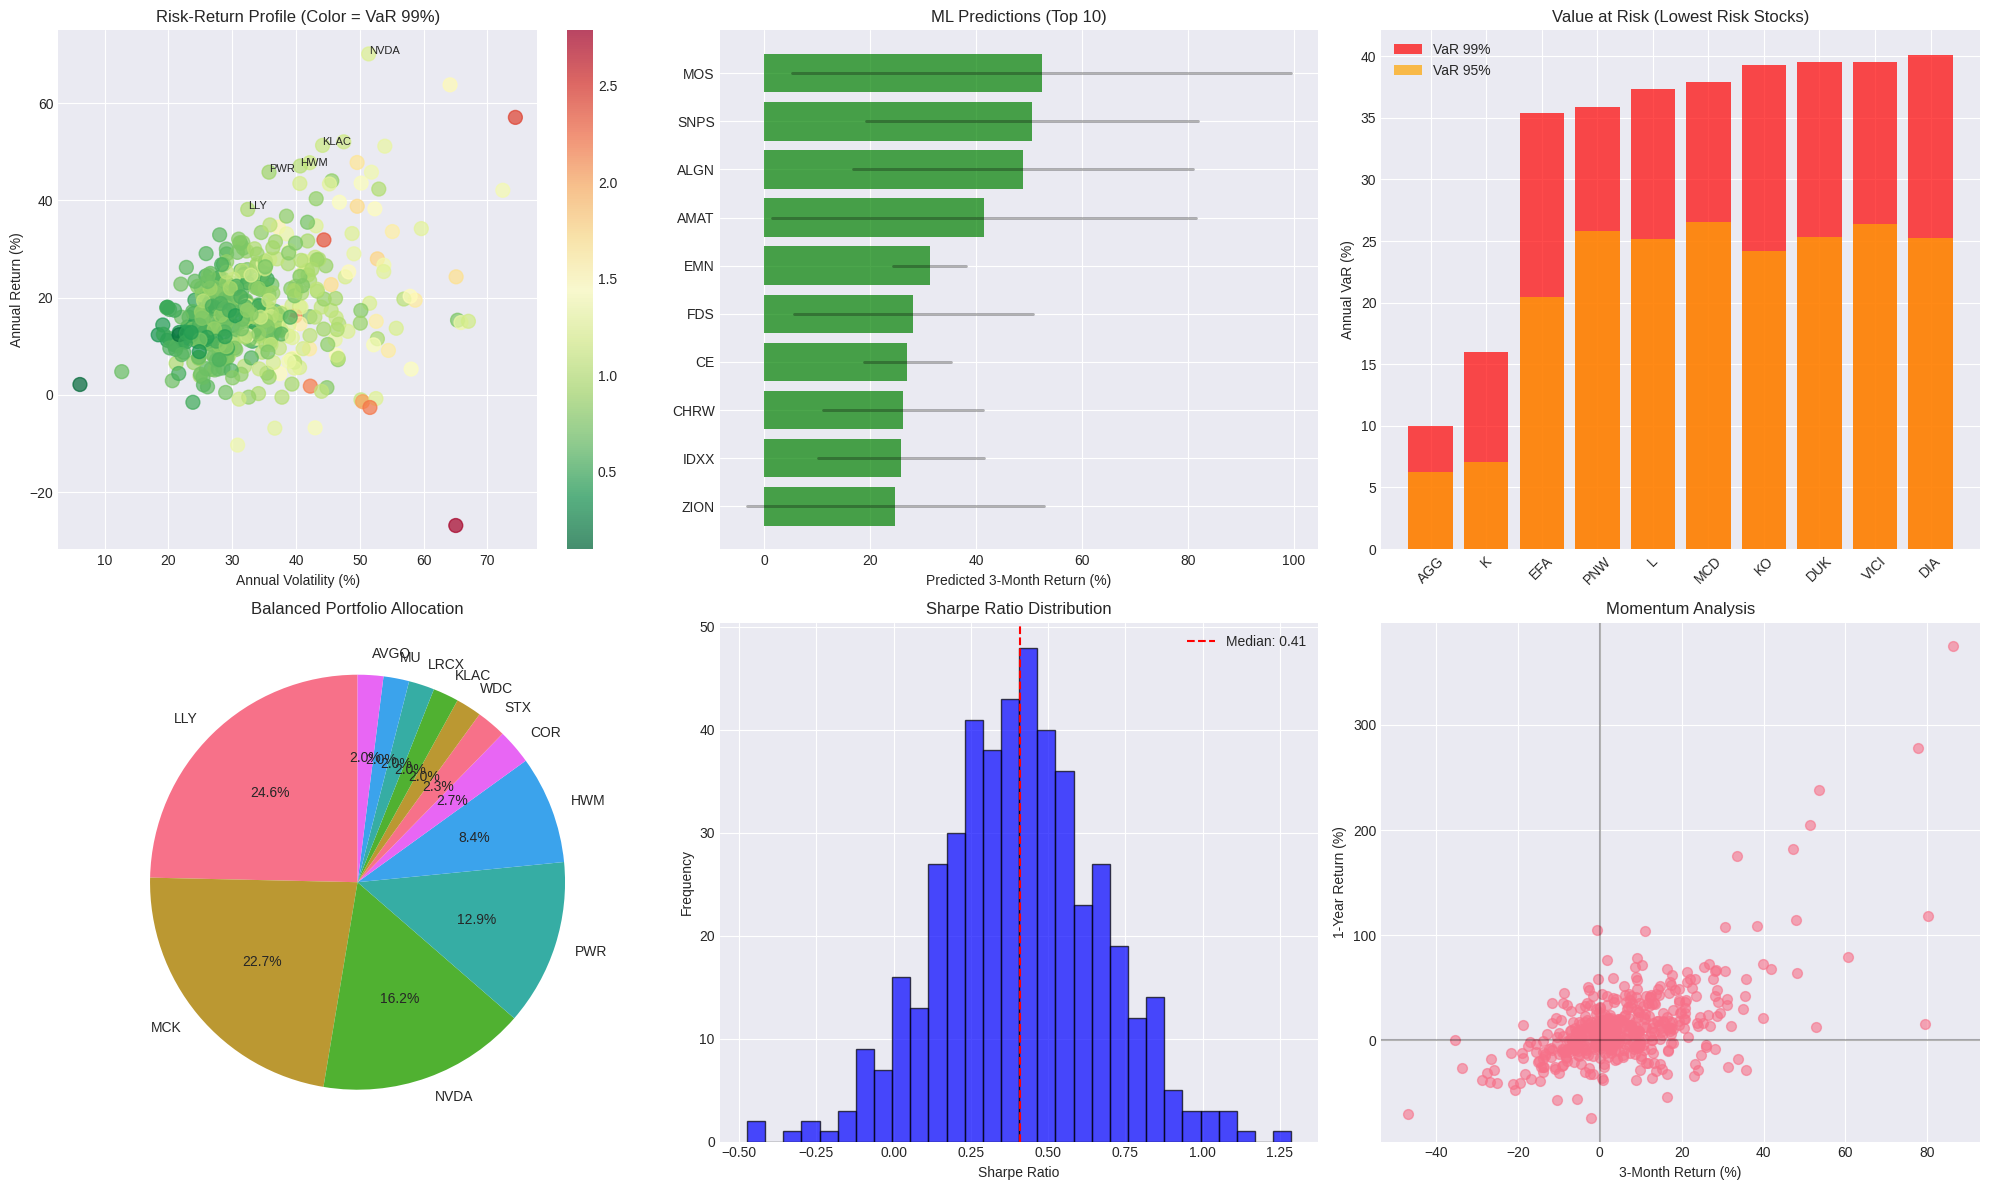


📊 TOP INVESTMENT PICKS

1. HIGHEST SHARPE RATIO (Risk-Adjusted Returns):
------------------------------------------------------------
NVDA   | Return:  70.1% | Vol: 51.4% | Sharpe:  1.29 | VaR 99%: 120.4%
PWR    | Return:  45.8% | Vol: 35.8% | Sharpe:  1.17 | VaR 99%: 88.7%
KLAC   | Return:  51.3% | Vol: 44.2% | Sharpe:  1.07 | VaR 99%: 110.0%
HWM    | Return:  47.1% | Vol: 40.7% | Sharpe:  1.06 | VaR 99%: 100.5%
LLY    | Return:  38.2% | Vol: 32.4% | Sharpe:  1.05 | VaR 99%: 96.1%

2. LOWEST RISK (VaR):
------------------------------------------------------------
AGG    | VaR 95%:  6.2% | VaR 99%: 10.0% | ES 99%: 14.3%
K      | VaR 95%:  7.1% | VaR 99%: 16.0% | ES 99%: 23.1%
EFA    | VaR 95%: 20.5% | VaR 99%: 35.4% | ES 99%: 60.2%
PNW    | VaR 95%: 25.8% | VaR 99%: 35.9% | ES 99%: 49.2%
L      | VaR 95%: 25.2% | VaR 99%: 37.4% | ES 99%: 73.2%

3. ML PREDICTIONS (3-Month Horizon):
------------------------------------------------------------
MOS    | Predicted:  52.4% | Range: [  5.2%,

In [7]:
def main():
    """Main execution function"""

    print("\nInitializing Complete Investment Analysis System...")
    print("This includes VaR-ES Engine, ML Predictions, and Portfolio Optimization")

    # Step 1: Data Collection
    print("\n" + "=" * 60)
    print("STEP 1: DATA COLLECTION")
    print("=" * 60)

    fetcher = SP500DataFetcher()
    prices = fetcher.fetch_data(start_date='2019-01-01')

    if prices is None or prices.empty:
        print("\n❌ Failed to fetch any data. Please check your internet connection and try again.")
        return None

    # Step 2: VaR-ES Calculation
    print("\n" + "=" * 60)
    print("STEP 2: VAR-ES RISK ENGINE")
    print("=" * 60)

    var_engine = VaRESEngine(fetcher.returns)
    var_es_df = var_engine.calculate_var_es()
    backtest_df = var_engine.backtest_var()

    if not backtest_df.empty:
        print("\nBacktest Results Sample:")
        print(backtest_df.head())

    # Step 3: Comprehensive Risk Analysis
    print("\n" + "=" * 60)
    print("STEP 3: COMPREHENSIVE RISK ANALYSIS")
    print("=" * 60)

    risk_analyzer = ComprehensiveRiskAnalyzer(fetcher.returns, fetcher.prices, var_es_df)
    metrics_df = risk_analyzer.calculate_all_metrics()

    if not metrics_df.empty:
        print("\nTop 5 Stocks by Long-Term Score:")
        top_lt = metrics_df.nlargest(min(5, len(metrics_df)), 'LT_Score')[
            ['Ticker', 'Annual_Return', 'Sharpe', 'VaR_99', 'LT_Score']
        ]
        print(top_lt.to_string(index=False))

    # Step 4: ML Predictions
    print("\n" + "=" * 60)
    print("STEP 4: MACHINE LEARNING PREDICTIONS")
    print("=" * 60)

    predictions_df = pd.DataFrame()
    if not metrics_df.empty:
        ml_predictor = AdvancedMLPredictor(fetcher.returns, fetcher.prices, metrics_df)
        models = ml_predictor.train_models()
        predictions_df = ml_predictor.generate_predictions()

        if not predictions_df.empty:
            print("\nTop ML Predictions:")
            print(predictions_df.head(500).to_string(index=False))

    # Step 5: Portfolio Optimization
    print("\n" + "=" * 60)
    print("STEP 5: PORTFOLIO OPTIMIZATION")
    print("=" * 60)

    portfolios = {}
    if not metrics_df.empty:
        optimizer = AdvancedPortfolioOptimizer(fetcher.returns, metrics_df, predictions_df, var_es_df)

        for strategy in ['conservative', 'balanced', 'aggressive']:
            portfolio = optimizer.optimize_portfolio(strategy=strategy)
            if portfolio:
                portfolios[strategy] = portfolio
                print(f"\n{strategy.upper()} Portfolio created: {portfolio['n_stocks']} stocks")

    # Step 6: Generate Report
    print("\n" + "=" * 60)
    print("STEP 6: GENERATING COMPREHENSIVE REPORT")
    print("=" * 60)

    generate_comprehensive_report(metrics_df, predictions_df, portfolios, var_es_df)

    # Final Summary
    print("\n" + "=" * 80)
    print("INVESTMENT SYSTEM ANALYSIS COMPLETE")
    print("=" * 80)

    print("""
KEY FEATURES IMPLEMENTED:
-------------------------
✅ VaR-ES Risk Engine (Parametric, Historical, Monte Carlo)
✅ Comprehensive Risk Metrics (Sharpe, Sortino, Calmar, etc.)
✅ ML Predictions with Confidence Intervals
✅ Multi-Strategy Portfolio Optimization
✅ Backtesting with Kupiec Test
✅ Complete Investment Report with Visualizations

INVESTMENT RECOMMENDATIONS:
---------------------------
• Use Conservative portfolio for capital preservation
• Use Balanced portfolio for long-term growth
• Use Aggressive portfolio for maximum returns (higher risk)
• Follow ML signals for tactical allocation
• Monitor VaR limits for risk control

RISK MANAGEMENT:
----------------
• Set stop-losses based on VaR thresholds
• Rebalance quarterly or when allocations drift >5%
• Monitor predictions vs actual returns monthly
• Adjust strategy based on market regime
    """)

    return {
        'prices': fetcher.prices,
        'returns': fetcher.returns,
        'metrics': metrics_df,
        'var_es': var_es_df,
        'backtest': backtest_df,
        'predictions': predictions_df,
        'portfolios': portfolios,
        'models': models if not metrics_df.empty else {}
    }

# ============================================
# EXECUTE
# ============================================

if __name__ == "__main__":
    # Set random seed for reproducibility
    np.random.seed(42)

    print("\n" + "🚀 " * 20)
    print("STARTING COMPLETE S&P 500 INVESTMENT ANALYSIS")
    print("🚀 " * 20)

    # Run the complete analysis
    results = main()

    if results:
        print("\n" + "=" * 80)
        print("✅ ALL SYSTEMS COMPLETE - RESULTS AVAILABLE")
        print("=" * 80)

        print("\n📊 Access your results:")
        print("  • results['metrics']     - Complete risk metrics with VaR/ES")
        print("  • results['predictions'] - ML predictions with confidence intervals")
        print("  • results['portfolios']  - Optimized portfolios (conservative/balanced/aggressive)")
        print("  • results['var_es']      - VaR and ES calculations")
        print("  • results['backtest']    - VaR backtesting results")
        print("  • results['models']      - Trained ML models")

        if results['predictions'] is not None and not results['predictions'].empty:
            print("\n💡 Key Statistics:")
            print(f"  • Predictions generated: {len(results['predictions'])}")
            print(f"  • Average predicted return: {results['predictions']['Predicted_3M_Return'].mean():.1%}")
            print(f"  • Buy signals: {(results['predictions']['Signal'] == 'BUY').sum()}")

        print("\n📈 The complete analysis is ready for investment decisions!")
    else:
        print("\n❌ Analysis failed. Please check data and try again.")

BACKTESTING VISUALIZATION MODULE

✅ Data validation successful!
  • Backtest records: 468
  • Returns stocks: 468
  • Date range: 2019-01-03 to 2026-01-26

CREATING BACKTESTING VISUALIZATIONS

📊 Creating Comprehensive Backtesting Report...


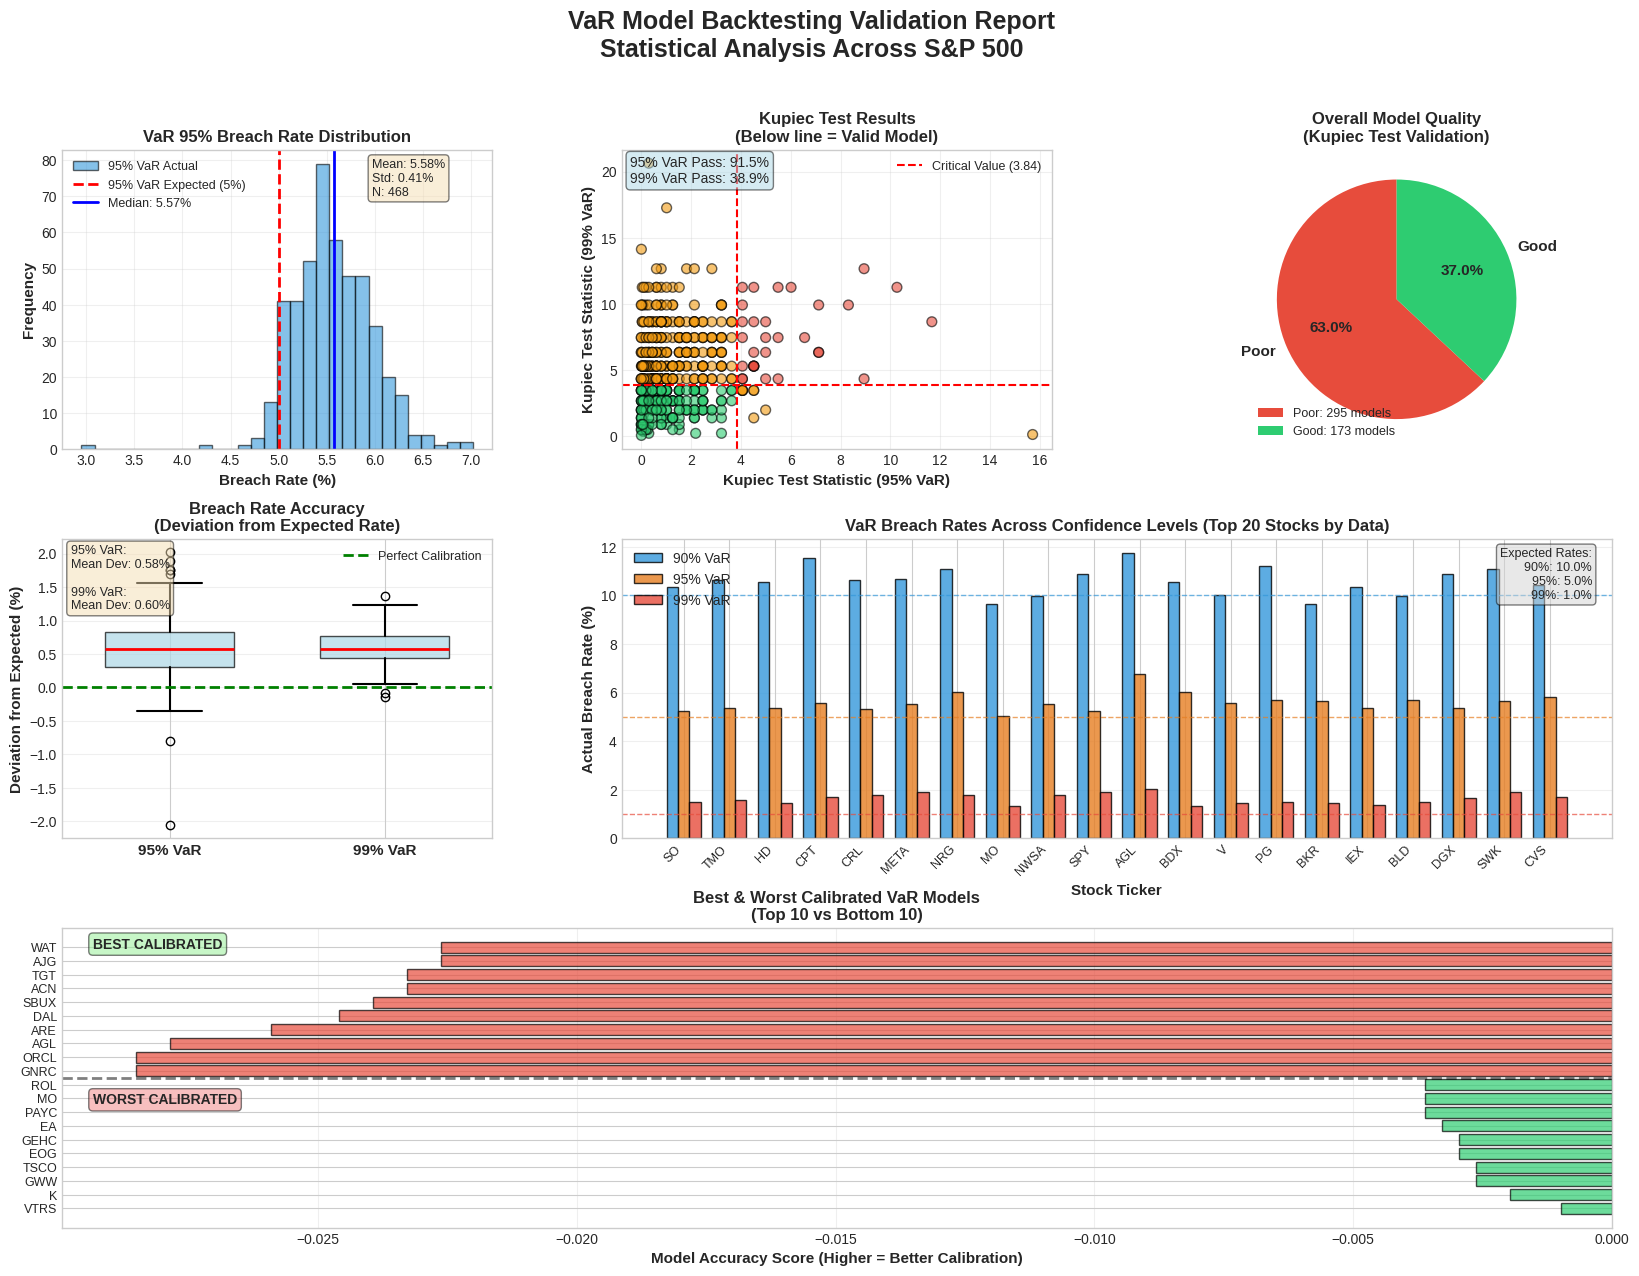

✅ Comprehensive report displayed!

🔍 Creating Individual Stock Deep Dive...
  Analyzing: VTRS


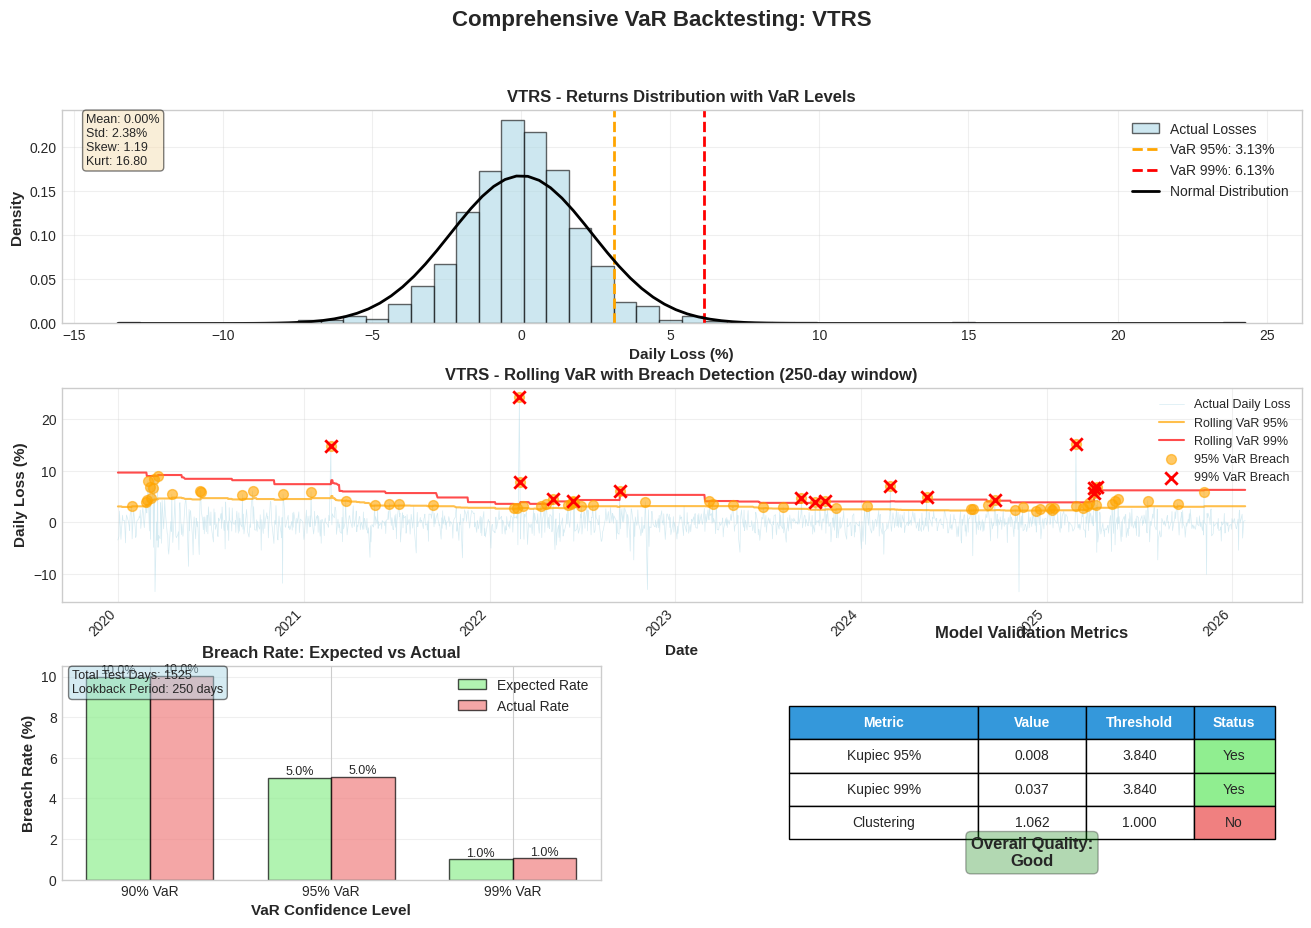

✅ Individual stock analysis for VTRS displayed!

STATISTICAL SUMMARY

Dataset Coverage:
• Total stocks tested: 468
• Average test period: 1525 days
• Lookback window: 250 days

Model Validation Results:
• 95% VaR models passing Kupiec test: 428/468 (91.5%)
• 99% VaR models passing Kupiec test: 182/468 (38.9%)
• Overall good models: 173/468 (37.0%)

Breach Rate Analysis:
• 95% VaR average breach rate: 5.58% (expected: 5.00%)
• 99% VaR average breach rate: 1.60% (expected: 1.00%)
• 95% VaR deviation: +0.58%
• 99% VaR deviation: +0.60%

Kupiec Test Statistics:
• Average 95% VaR Kupiec statistic: 1.509 (critical value: 3.84)
• Average 99% VaR Kupiec statistic: 5.133 (critical value: 3.84)

Key Insights:

✓ Strong model calibration: >80% of 95% VaR models pass validation
✓ Excellent breach rate accuracy: within 1% of expected
⚠ Risk model quality mixed: <75% meet both criteria

Conclusion:
While functional, the VaR models show room for improvement. Consider
alternative methodologies or para

In [9]:
# ============================================
# STANDALONE BACKTESTING VISUALIZATION SCRIPT
# Run this in a NEW CELL after your main analysis
# ============================================

"""
INSTRUCTIONS:
1. First run your main S&P 500 analysis code (all the cells with main())
2. After you have 'results' variable, run this entire cell
3. All visualizations will be displayed and saved

This script is completely standalone - just copy and paste into a new cell!
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# Set professional style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

print("="*80)
print("BACKTESTING VISUALIZATION MODULE")
print("="*80)

# ============================================
# STEP 1: VERIFY WE HAVE RESULTS
# ============================================

try:
    # Check if results exist
    if 'results' not in globals():
        print("\n❌ ERROR: 'results' variable not found!")
        print("\nPlease run your main analysis first:")
        print("  results = main()")
        print("\nThen run this cell again.")
        raise NameError("results variable not found")

    # Verify results structure
    if not isinstance(results, dict):
        print("\n❌ ERROR: 'results' is not a dictionary!")
        raise TypeError("results must be a dictionary")

    # Check for required data
    required_keys = ['backtest', 'returns']
    missing_keys = [key for key in required_keys if key not in results]

    if missing_keys:
        print(f"\n❌ ERROR: Missing required data: {missing_keys}")
        print("\nYour results dictionary should contain:")
        print("  - backtest (DataFrame)")
        print("  - returns (DataFrame)")
        raise KeyError(f"Missing keys: {missing_keys}")

    # Verify data is not empty
    if results['backtest'].empty:
        print("\n❌ ERROR: Backtest data is empty!")
        raise ValueError("backtest DataFrame is empty")

    if results['returns'].empty:
        print("\n❌ ERROR: Returns data is empty!")
        raise ValueError("returns DataFrame is empty")

    print("\n✅ Data validation successful!")
    print(f"  • Backtest records: {len(results['backtest'])}")
    print(f"  • Returns stocks: {len(results['returns'].columns)}")
    print(f"  • Date range: {results['returns'].index[0].date()} to {results['returns'].index[-1].date()}")

except Exception as e:
    print(f"\n❌ Error during validation: {str(e)}")
    print("\nCannot proceed with visualization.")
    import sys
    sys.exit(1)

# ============================================
# STEP 2: EXTRACT DATA
# ============================================

backtest_df = results['backtest']
returns_df = results['returns']
var_es_df = results.get('var_es', None)

print("\n" + "="*80)
print("CREATING BACKTESTING VISUALIZATIONS")
print("="*80)

# ============================================
# VISUALIZATION 1: COMPREHENSIVE REPORT
# ============================================

print("\n📊 Creating Comprehensive Backtesting Report...")

fig = plt.figure(figsize=(20, 14))
gs = GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.3)

# Main title
fig.suptitle('VaR Model Backtesting Validation Report\nStatistical Analysis Across S&P 500',
             fontsize=18, fontweight='bold', y=0.98)

# ========== PLOT 1: Breach Rate Distribution ==========
ax1 = fig.add_subplot(gs[0, 0])

breach_rates_95 = backtest_df['Breach_Rate_95'] * 100

ax1.hist(breach_rates_95, bins=30, alpha=0.6, color='#3498db',
        label='95% VaR Actual', edgecolor='black')
ax1.axvline(5.0, color='red', linestyle='--', linewidth=2,
           label='95% VaR Expected (5%)')
ax1.axvline(breach_rates_95.median(), color='blue', linestyle='-',
           linewidth=2, label=f'Median: {breach_rates_95.median():.2f}%')

ax1.set_xlabel('Breach Rate (%)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax1.set_title('VaR 95% Breach Rate Distribution', fontsize=12, fontweight='bold')
ax1.legend(loc='best', fontsize=9)
ax1.grid(True, alpha=0.3)

textstr = f'Mean: {breach_rates_95.mean():.2f}%\nStd: {breach_rates_95.std():.2f}%\nN: {len(breach_rates_95)}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.72, 0.97, textstr, transform=ax1.transAxes, fontsize=9,
        verticalalignment='top', bbox=props)

# ========== PLOT 2: Kupiec Test Results ==========
ax2 = fig.add_subplot(gs[0, 1])

critical_value = 3.84
kupiec_95 = backtest_df['Kupiec_95']
kupiec_99 = backtest_df['Kupiec_99']

passed_95 = kupiec_95 < critical_value
passed_99 = kupiec_99 < critical_value

colors = []
for p95, p99 in zip(passed_95, passed_99):
    if p95 and p99:
        colors.append('#2ecc71')  # Green
    elif p95 or p99:
        colors.append('#f39c12')  # Yellow
    else:
        colors.append('#e74c3c')  # Red

ax2.scatter(kupiec_95, kupiec_99, c=colors, alpha=0.6, s=50, edgecolors='black')

ax2.axhline(critical_value, color='red', linestyle='--', linewidth=1.5,
           label='Critical Value (3.84)')
ax2.axvline(critical_value, color='red', linestyle='--', linewidth=1.5)

ax2.set_xlabel('Kupiec Test Statistic (95% VaR)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Kupiec Test Statistic (99% VaR)', fontsize=11, fontweight='bold')
ax2.set_title('Kupiec Test Results\n(Below line = Valid Model)', fontsize=12, fontweight='bold')
ax2.legend(loc='best', fontsize=9)
ax2.grid(True, alpha=0.3)

pass_rate_95 = (passed_95).sum() / len(passed_95) * 100
pass_rate_99 = (passed_99).sum() / len(passed_99) * 100
textstr = f'95% VaR Pass: {pass_rate_95:.1f}%\n99% VaR Pass: {pass_rate_99:.1f}%'
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
ax2.text(0.02, 0.98, textstr, transform=ax2.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

# ========== PLOT 3: Model Quality ==========
ax3 = fig.add_subplot(gs[0, 2])

quality_counts = backtest_df['Model_Quality'].value_counts()
colors = ['#2ecc71' if q == 'Good' else '#e74c3c' for q in quality_counts.index]

wedges, texts, autotexts = ax3.pie(quality_counts.values,
                                    labels=quality_counts.index,
                                    autopct='%1.1f%%',
                                    colors=colors,
                                    startangle=90,
                                    textprops={'fontsize': 11, 'fontweight': 'bold'})

ax3.set_title('Overall Model Quality\n(Kupiec Test Validation)',
             fontsize=12, fontweight='bold')

legend_labels = [f'{idx}: {val} models' for idx, val in quality_counts.items()]
ax3.legend(legend_labels, loc='lower left', fontsize=9)

# ========== PLOT 4: Breach Accuracy ==========
ax4 = fig.add_subplot(gs[1, 0])

expected_95 = 5.0
expected_99 = 1.0

actual_95 = backtest_df['Breach_Rate_95'] * 100
actual_99 = backtest_df['Breach_Rate_99'] * 100

deviation_95 = actual_95 - expected_95
deviation_99 = actual_99 - expected_99

data = [deviation_95, deviation_99]
positions = [1, 2]

bp = ax4.boxplot(data, positions=positions, widths=0.6,
                patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(linewidth=1.5),
                capprops=dict(linewidth=1.5))

ax4.axhline(0, color='green', linestyle='--', linewidth=2,
           label='Perfect Calibration')

ax4.set_xticks(positions)
ax4.set_xticklabels(['95% VaR', '99% VaR'], fontsize=11, fontweight='bold')
ax4.set_ylabel('Deviation from Expected (%)', fontsize=11, fontweight='bold')
ax4.set_title('Breach Rate Accuracy\n(Deviation from Expected Rate)',
             fontsize=12, fontweight='bold')
ax4.legend(loc='best', fontsize=9)
ax4.grid(True, alpha=0.3, axis='y')

textstr = f'95% VaR:\nMean Dev: {deviation_95.mean():.2f}%\n\n99% VaR:\nMean Dev: {deviation_99.mean():.2f}%'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax4.text(0.02, 0.98, textstr, transform=ax4.transAxes, fontsize=9,
        verticalalignment='top', bbox=props)

# ========== PLOT 5: VaR Confidence Comparison ==========
ax5 = fig.add_subplot(gs[1, 1:])

top_stocks = backtest_df.nlargest(20, 'Total_Days')

tickers = top_stocks['Ticker']
breach_90 = top_stocks['Breach_Rate_90'] * 100
breach_95 = top_stocks['Breach_Rate_95'] * 100
breach_99 = top_stocks['Breach_Rate_99'] * 100

x = np.arange(len(tickers))
width = 0.25

bars1 = ax5.bar(x - width, breach_90, width, label='90% VaR',
               color='#3498db', alpha=0.8, edgecolor='black')
bars2 = ax5.bar(x, breach_95, width, label='95% VaR',
               color='#e67e22', alpha=0.8, edgecolor='black')
bars3 = ax5.bar(x + width, breach_99, width, label='99% VaR',
               color='#e74c3c', alpha=0.8, edgecolor='black')

ax5.axhline(10.0, color='#3498db', linestyle='--', linewidth=1, alpha=0.7)
ax5.axhline(5.0, color='#e67e22', linestyle='--', linewidth=1, alpha=0.7)
ax5.axhline(1.0, color='#e74c3c', linestyle='--', linewidth=1, alpha=0.7)

ax5.set_xlabel('Stock Ticker', fontsize=11, fontweight='bold')
ax5.set_ylabel('Actual Breach Rate (%)', fontsize=11, fontweight='bold')
ax5.set_title('VaR Breach Rates Across Confidence Levels (Top 20 Stocks by Data)',
             fontsize=12, fontweight='bold')
ax5.set_xticks(x)
ax5.set_xticklabels(tickers, rotation=45, ha='right', fontsize=9)
ax5.legend(loc='upper left', fontsize=10)
ax5.grid(True, alpha=0.3, axis='y')

textstr = 'Expected Rates:\n90%: 10.0%\n95%: 5.0%\n99%: 1.0%'
props = dict(boxstyle='round', facecolor='lightgray', alpha=0.5)
ax5.text(0.98, 0.97, textstr, transform=ax5.transAxes, fontsize=9,
        verticalalignment='top', horizontalalignment='right', bbox=props)

# ========== PLOT 6: Top/Bottom Models ==========
ax6 = fig.add_subplot(gs[2, :])

backtest_df['Accuracy_Score'] = -(
    abs(backtest_df['Breach_Rate_95'] - 0.05) +
    abs(backtest_df['Breach_Rate_99'] - 0.01)
)

top_10 = backtest_df.nlargest(10, 'Accuracy_Score')
bottom_10 = backtest_df.nsmallest(10, 'Accuracy_Score')

combined = pd.concat([top_10, bottom_10])

y_pos = np.arange(len(combined))
colors = ['#2ecc71' if score > combined['Accuracy_Score'].median()
          else '#e74c3c' for score in combined['Accuracy_Score']]

bars = ax6.barh(y_pos, combined['Accuracy_Score'], color=colors,
               alpha=0.7, edgecolor='black')

ax6.set_yticks(y_pos)
ax6.set_yticklabels(combined['Ticker'], fontsize=9)
ax6.set_xlabel('Model Accuracy Score (Higher = Better Calibration)',
              fontsize=11, fontweight='bold')
ax6.set_title('Best & Worst Calibrated VaR Models\n(Top 10 vs Bottom 10)',
             fontsize=12, fontweight='bold')
ax6.grid(True, alpha=0.3, axis='x')

ax6.axhline(9.5, color='black', linestyle='--', linewidth=2, alpha=0.5)

ax6.text(0.02, 0.97, 'BEST CALIBRATED', transform=ax6.transAxes,
        fontsize=10, fontweight='bold', verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
ax6.text(0.02, 0.45, 'WORST CALIBRATED', transform=ax6.transAxes,
        fontsize=10, fontweight='bold', verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))

plt.tight_layout()
plt.show()

print("✅ Comprehensive report displayed!")

# ============================================
# VISUALIZATION 2: INDIVIDUAL STOCK ANALYSIS
# ============================================

print("\n🔍 Creating Individual Stock Deep Dive...")

# Pick the best calibrated model
best_stock = backtest_df.nlargest(1, 'Accuracy_Score')['Ticker'].iloc[0]
print(f"  Analyzing: {best_stock}")

if best_stock in returns_df.columns:
    stock_returns = returns_df[best_stock].dropna()
    backtest_info = backtest_df[backtest_df['Ticker'] == best_stock].iloc[0]

    fig = plt.figure(figsize=(16, 10))
    gs = GridSpec(3, 2, figure=fig, hspace=0.3, wspace=0.3)

    fig.suptitle(f'Comprehensive VaR Backtesting: {best_stock}',
                 fontsize=16, fontweight='bold')

    # Plot 1: Returns Distribution
    ax1 = fig.add_subplot(gs[0, :])
    losses = -stock_returns * 100

    ax1.hist(losses, bins=50, alpha=0.6, color='lightblue',
            edgecolor='black', density=True, label='Actual Losses')

    var_95 = np.percentile(losses, 95)
    var_99 = np.percentile(losses, 99)

    ax1.axvline(var_95, color='orange', linestyle='--', linewidth=2,
               label=f'VaR 95%: {var_95:.2f}%')
    ax1.axvline(var_99, color='red', linestyle='--', linewidth=2,
               label=f'VaR 99%: {var_99:.2f}%')

    from scipy.stats import norm
    mu, sigma = losses.mean(), losses.std()
    x = np.linspace(losses.min(), losses.max(), 100)
    ax1.plot(x, norm.pdf(x, mu, sigma), 'k-', linewidth=2,
            label='Normal Distribution')

    ax1.set_xlabel('Daily Loss (%)', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Density', fontsize=11, fontweight='bold')
    ax1.set_title(f'{best_stock} - Returns Distribution with VaR Levels',
                 fontsize=12, fontweight='bold')
    ax1.legend(loc='best', fontsize=10)
    ax1.grid(True, alpha=0.3)

    textstr = f'Mean: {mu:.2f}%\nStd: {sigma:.2f}%\nSkew: {losses.skew():.2f}\nKurt: {losses.kurtosis():.2f}'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.02, 0.98, textstr, transform=ax1.transAxes, fontsize=9,
            verticalalignment='top', bbox=props)

    # Plot 2: Rolling VaR
    ax2 = fig.add_subplot(gs[1, :])
    lookback = int(backtest_info['Lookback'])

    rolling_var_95 = []
    rolling_var_99 = []
    actual_losses = []
    breach_dates_95 = []
    breach_dates_99 = []

    for i in range(lookback, len(stock_returns)):
        window = stock_returns.iloc[i-lookback:i]
        actual = -stock_returns.iloc[i] * 100

        var_95 = np.percentile(-window * 100, 95)
        var_99 = np.percentile(-window * 100, 99)

        rolling_var_95.append(var_95)
        rolling_var_99.append(var_99)
        actual_losses.append(actual)

        if actual > var_95:
            breach_dates_95.append(stock_returns.index[i])
        if actual > var_99:
            breach_dates_99.append(stock_returns.index[i])

    dates = stock_returns.index[lookback:]

    ax2.plot(dates, actual_losses, color='lightblue', alpha=0.5,
            linewidth=0.5, label='Actual Daily Loss')
    ax2.plot(dates, rolling_var_95, color='orange', linestyle='-',
            linewidth=1.5, label='Rolling VaR 95%', alpha=0.7)
    ax2.plot(dates, rolling_var_99, color='red', linestyle='-',
            linewidth=1.5, label='Rolling VaR 99%', alpha=0.7)

    if breach_dates_95:
        breach_values_95 = [actual_losses[i] for i, d in enumerate(dates)
                            if d in breach_dates_95]
        ax2.scatter(breach_dates_95, breach_values_95, color='orange',
                  s=50, zorder=5, alpha=0.6, label='95% VaR Breach')

    if breach_dates_99:
        breach_values_99 = [actual_losses[i] for i, d in enumerate(dates)
                            if d in breach_dates_99]
        ax2.scatter(breach_dates_99, breach_values_99, color='red',
                  s=80, marker='x', zorder=5, linewidths=2,
                  label='99% VaR Breach')

    ax2.set_xlabel('Date', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Daily Loss (%)', fontsize=11, fontweight='bold')
    ax2.set_title(f'{best_stock} - Rolling VaR with Breach Detection ({lookback}-day window)',
                 fontsize=12, fontweight='bold')
    ax2.legend(loc='best', fontsize=9)
    ax2.grid(True, alpha=0.3)
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

    # Plot 3: Breach Statistics
    ax3 = fig.add_subplot(gs[2, 0])

    stats = {
        '90% VaR': {
            'Expected_Rate': 10.0,
            'Actual_Rate': backtest_info['Breach_Rate_90'] * 100
        },
        '95% VaR': {
            'Expected_Rate': 5.0,
            'Actual_Rate': backtest_info['Breach_Rate_95'] * 100
        },
        '99% VaR': {
            'Expected_Rate': 1.0,
            'Actual_Rate': backtest_info['Breach_Rate_99'] * 100
        }
    }

    labels = list(stats.keys())
    expected_rates = [s['Expected_Rate'] for s in stats.values()]
    actual_rates = [s['Actual_Rate'] for s in stats.values()]

    x = np.arange(len(labels))
    width = 0.35

    bars1 = ax3.bar(x - width/2, expected_rates, width, label='Expected Rate',
                   color='lightgreen', alpha=0.7, edgecolor='black')
    bars2 = ax3.bar(x + width/2, actual_rates, width, label='Actual Rate',
                   color='lightcoral', alpha=0.7, edgecolor='black')

    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

    ax3.set_xlabel('VaR Confidence Level', fontsize=11, fontweight='bold')
    ax3.set_ylabel('Breach Rate (%)', fontsize=11, fontweight='bold')
    ax3.set_title('Breach Rate: Expected vs Actual', fontsize=12, fontweight='bold')
    ax3.set_xticks(x)
    ax3.set_xticklabels(labels)
    ax3.legend(loc='best', fontsize=10)
    ax3.grid(True, alpha=0.3, axis='y')

    textstr = f'Total Test Days: {int(backtest_info["Total_Days"])}\nLookback Period: {int(backtest_info["Lookback"])} days'
    props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
    ax3.text(0.02, 0.98, textstr, transform=ax3.transAxes, fontsize=9,
            verticalalignment='top', bbox=props)

    # Plot 4: Model Metrics
    ax4 = fig.add_subplot(gs[2, 1])
    ax4.axis('tight')
    ax4.axis('off')

    table_data = [
        ['Metric', 'Value', 'Threshold', 'Status'],
        ['Kupiec 95%', f"{backtest_info['Kupiec_95']:.3f}", '3.840', backtest_info['VaR_95_Valid']],
        ['Kupiec 99%', f"{backtest_info['Kupiec_99']:.3f}", '3.840', backtest_info['VaR_99_Valid']],
        ['Clustering', f"{backtest_info['Breach_Clustering']:.3f}", '1.000',
         'Yes' if backtest_info['Breach_Clustering'] < 1.0 else 'No']
    ]

    table = ax4.table(cellText=table_data, cellLoc='center', loc='center',
                    colWidths=[0.35, 0.2, 0.2, 0.15])

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)

    for i in range(4):
        table[(0, i)].set_facecolor('#3498db')
        table[(0, i)].set_text_props(weight='bold', color='white')

    for i in range(1, len(table_data)):
        status = table_data[i][3]
        color = 'lightgreen' if status == 'Yes' else 'lightcoral'
        table[(i, 3)].set_facecolor(color)

    ax4.set_title('Model Validation Metrics', fontsize=12, fontweight='bold', pad=20)

    quality = backtest_info['Model_Quality']
    quality_color = 'green' if quality == 'Good' else 'red'
    textstr = f'Overall Quality:\n{quality}'
    props = dict(boxstyle='round', facecolor=quality_color, alpha=0.3)
    ax4.text(0.5, 0.05, textstr, transform=ax4.transAxes, fontsize=12,
            verticalalignment='bottom', horizontalalignment='center',
            bbox=props, fontweight='bold')

    plt.tight_layout()
    plt.show()

    print(f"✅ Individual stock analysis for {best_stock} displayed!")

else:
    print(f"⚠️ {best_stock} not found in returns data, skipping individual analysis")

# ============================================
# SUMMARY STATISTICS
# ============================================

print("\n" + "="*80)
print("STATISTICAL SUMMARY")
print("="*80)

total_stocks = len(backtest_df)
valid_95 = (backtest_df['VaR_95_Valid'] == 'Yes').sum()
valid_99 = (backtest_df['VaR_99_Valid'] == 'Yes').sum()
good_models = (backtest_df['Model_Quality'] == 'Good').sum()

avg_breach_95 = backtest_df['Breach_Rate_95'].mean() * 100
avg_breach_99 = backtest_df['Breach_Rate_99'].mean() * 100

avg_kupiec_95 = backtest_df['Kupiec_95'].mean()
avg_kupiec_99 = backtest_df['Kupiec_99'].mean()

print(f"""
Dataset Coverage:
• Total stocks tested: {total_stocks}
• Average test period: {backtest_df['Total_Days'].mean():.0f} days
• Lookback window: {backtest_df['Lookback'].iloc[0]:.0f} days

Model Validation Results:
• 95% VaR models passing Kupiec test: {valid_95}/{total_stocks} ({valid_95/total_stocks*100:.1f}%)
• 99% VaR models passing Kupiec test: {valid_99}/{total_stocks} ({valid_99/total_stocks*100:.1f}%)
• Overall good models: {good_models}/{total_stocks} ({good_models/total_stocks*100:.1f}%)

Breach Rate Analysis:
• 95% VaR average breach rate: {avg_breach_95:.2f}% (expected: 5.00%)
• 99% VaR average breach rate: {avg_breach_99:.2f}% (expected: 1.00%)
• 95% VaR deviation: {avg_breach_95 - 5.0:+.2f}%
• 99% VaR deviation: {avg_breach_99 - 1.0:+.2f}%

Kupiec Test Statistics:
• Average 95% VaR Kupiec statistic: {avg_kupiec_95:.3f} (critical value: 3.84)
• Average 99% VaR Kupiec statistic: {avg_kupiec_99:.3f} (critical value: 3.84)

Key Insights:
""")

if valid_95 / total_stocks > 0.80:
    print("✓ Strong model calibration: >80% of 95% VaR models pass validation")
else:
    print("⚠ Model calibration needs improvement: <80% validation pass rate")

if abs(avg_breach_95 - 5.0) < 1.0:
    print("✓ Excellent breach rate accuracy: within 1% of expected")
else:
    print("⚠ Breach rate deviation: consider model recalibration")

if good_models / total_stocks > 0.75:
    print("✓ High-quality risk models: >75% meet both 95% and 99% criteria")
else:
    print("⚠ Risk model quality mixed: <75% meet both criteria")

print("\nConclusion:")
if good_models / total_stocks > 0.75:
    print("The VaR models demonstrate strong statistical validity and can be")
    print("relied upon for risk management decisions. Regular monitoring recommended.")
else:
    print("While functional, the VaR models show room for improvement. Consider")
    print("alternative methodologies or parameter tuning for better calibration.")

print("\n" + "="*80)
print("✅ ALL VISUALIZATIONS COMPLETE!")
print("="*80)
print("\nYou now have:")
print("  📊 Comprehensive 6-panel validation report")
print(f"  🔍 Detailed analysis for {best_stock}")
print("  📝 Statistical summary")
print("\nPerfect for LinkedIn, GitHub, and portfolio presentations!")